# Customizations basics: tensors and operations 

In [3]:
import tensorflow as tf

In [4]:
print(tf.add([1, 2], [3, 4]))
print(tf.add(1, 2))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))
print(tf.square(2) + tf.square(3))

tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [5]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [6]:
import numpy as np
ndarray = np.ones([3, 3])
print("tensorflow operations convert numpy arrays to tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)
print("And Numpy operations convert tensor to numpy arrays automatically")
print(np.add(tensor, 1))
print("The .numpy() method explicitly converts a tensor to a numpy array")
print(tensor.numpy())

tensorflow operations convert numpy arrays to tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And Numpy operations convert tensor to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [7]:
x = tf.random.uniform([3, 3])
print("Is there a GPU available: ")
print(tf.config.list_physical_devices("GPU"))
print("Is the Tensor on GPU #0: ")
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0: 
False


In [8]:
import time
def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)
    result = time.time() - start
    print("10 loops: {:0.2f}ms".format(1000*result))
print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

On CPU:
10 loops: 274.61ms


In [9]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
import tempfile
_, filename = tempfile.mkstemp()
with open(filename, 'w') as f:
    f.write('''Line 1 Line 2 Line 3''')
ds_file = tf.data.TextLineDataset(filename)

In [11]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)
ds_file = ds_file.batch(2)

In [12]:
print('Elements of ds_tensors:')
for x in ds_tensors:
    print(x)
print("\nElements in ds_file:")
for x in ds_file:
    print(x)

Elements of ds_tensors:
tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([ 4 25], shape=(2,), dtype=int32)
tf.Tensor([16 36], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1 Line 2 Line 3'], shape=(1,), dtype=string)


# Custom layers

In [13]:
import tensorflow as tf

In [14]:
print(tf.config.list_physical_devices('GPU'))

[]


In [15]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [16]:
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [17]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.34958926,  0.32534224, -0.6231544 , -0.20107749, -0.6001416 ,
         -0.2823409 ,  0.24833012,  0.01016033,  0.25776726, -0.26132497],
        [-0.02598971,  0.19416803,  0.03269833, -0.15724835, -0.02312022,
         -0.09973574,  0.57697207, -0.19665965, -0.44903547, -0.424186  ],
        [ 0.07943529, -0.5210106 ,  0.60379726, -0.10947716,  0.46878868,
          0.14641684,  0.34296495,  0.08711815, -0.47242755,  0.57865185],
        [ 0.5624363 ,  0.27148455, -0.3425483 ,  0.35774195, -0.23853019,
         -0.19236398, -0.17769626, -0.2906016 ,  0.20853579, -0.34914353],
        [ 0.41655105, -0.38819987,  0.16815978,  0.06189728, -0.2389183 ,
         -0.5940373 , -0.22102237, -0.57782626,  0.44314688, -0.19851181]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [18]:
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.34958926,  0.32534224, -0.6231544 , -0.20107749, -0.6001416 ,
         -0.2823409 ,  0.24833012,  0.01016033,  0.25776726, -0.26132497],
        [-0.02598971,  0.19416803,  0.03269833, -0.15724835, -0.02312022,
         -0.09973574,  0.57697207, -0.19665965, -0.44903547, -0.424186  ],
        [ 0.07943529, -0.5210106 ,  0.60379726, -0.10947716,  0.46878868,
          0.14641684,  0.34296495,  0.08711815, -0.47242755,  0.57865185],
        [ 0.5624363 ,  0.27148455, -0.3425483 ,  0.35774195, -0.23853019,
         -0.19236398, -0.17769626, -0.2906016 ,  0.20853579, -0.34914353],
        [ 0.41655105, -0.38819987,  0.16815978,  0.06189728, -0.2389183 ,
         -0.5940373 , -0.22102237, -0.57782626,  0.44314688, -0.19851181]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [19]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)
layer = MyDenseLayer(10)

In [20]:
_ = layer(tf.zeros([10, 5]))

In [21]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


In [26]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        x += input_tensor
        return tf.nn.relu(x)
block = ResnetIdentityBlock(1, [1, 2, 3])

In [27]:
_ = block(tf.zeros([1, 2, 3, 3]))
block.layers

In [28]:
len(block.variables)

18

In [29]:
block.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           multiple                  4         
                                                                 
 batch_normalization_1 (Batc  multiple                 4         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           multiple                  4         
                                                                 
 batch_normalization_2 (Batc  multiple                 8         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           multiple                  9         
                                                                 
 batch_normalization_3 (Batc  multiple                 12        


In [30]:
my_seq = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (1, 1), input_shape=(None, None, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(2, 1, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, (1, 1)),
    tf.keras.layers.BatchNormalization()
])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [32]:
my_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, None, None, 1)     4         
                                                                 
 batch_normalization_4 (Batc  (None, None, None, 1)    4         
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 2)     4         
                                                                 
 batch_normalization_5 (Batc  (None, None, None, 2)    8         
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, None, None, 3)     9         
                                                                 
 batch_normalization_6 (Batc  (None, None, None, 3)    1

# Custom Training walkthrough

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print("Tensorflow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

Tensorflow version: 2.7.0
Eager execution: True


In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

16384/2194 [================================================================================================================================================================================================================================] - 0s 0s/step
Local copy of the dataset file: C:\Users\jatin\.keras\datasets\iris_training.csv


In [9]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
features_names = column_names[:-1]
label_name = column_names[-1]
print("Features: {}".format(features_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [10]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [13]:
batch_size = 32
train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp, batch_size, column_names=column_names,
                                                      label_name=label_name, num_epochs=1)

In [14]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 5.6, 5. , 4.7, 5.7, 5.7, 7.7, 5.5, 6.1, 5. , 5.7, 7.9, 5.8,
       5.1, 5.1, 5.3, 5.4, 6.6, 6.4, 4.6, 5.8, 6.7, 5.7, 6. , 5. , 4.9,
       6.4, 4.8, 5.7, 5.6, 5.5, 5.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 2.7, 2.3, 3.2, 3. , 3.8, 2.6, 3.5, 2.6, 3.2, 2.8, 3.8, 2.7,
       3.8, 3.5, 3.7, 3.7, 3. , 2.7, 3.4, 2.7, 3. , 2.8, 2.7, 3.3, 3.1,
       2.8, 3.4, 2.9, 2.9, 2.4, 2.7], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 4.2, 3.3, 1.3, 4.2, 1.7, 6.9, 1.3, 5.6, 1.2, 4.1, 6.4, 4.1,
       1.9, 1.4, 1.5, 1.5, 4.4, 5.3, 1.4, 5.1, 5.2, 4.5, 5.1, 1.4, 1.5,
       5.6, 1.6, 4.2, 3.6, 3.8, 3.9], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.1, 1.3, 1. , 0.2, 1.2, 0.3, 2.3, 0.2, 1.4, 0.2, 1.3, 2. , 1. ,
       0.4, 0.3, 0.2, 0.2, 1.4, 1.9, 0.3, 1.9, 2.3, 1.3, 1.6,

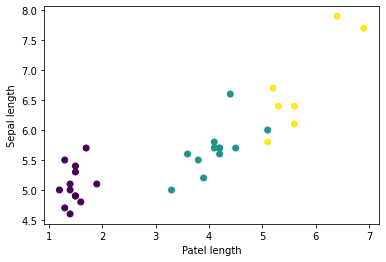

In [15]:
plt.scatter(features['petal_length'], features['sepal_length'], c=labels, cmap='viridis')
plt.xlabel("Patel length")
plt.ylabel("Sepal length")
plt.show()

In [16]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [17]:
train_dataset = train_dataset.map(pack_features_vector)

In [18]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[5.9 3.2 4.8 1.8]
 [4.9 2.5 4.5 1.7]
 [6.2 3.4 5.4 2.3]
 [6.  2.2 5.  1.5]
 [5.4 3.9 1.7 0.4]], shape=(5, 4), dtype=float32)


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [22]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.1287661 ,  0.07966307, -1.2743047 ],
       [ 0.9470901 ,  0.01169421, -1.2322073 ],
       [ 1.1975331 ,  0.03033862, -1.5302452 ],
       [ 0.994638  ,  0.04182881, -1.1290634 ],
       [ 0.9531929 , -0.13332757, -0.28879857]], dtype=float32)>

In [24]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.6941111 , 0.24311364, 0.06277527],
       [0.6642084 , 0.26065564, 0.07513591],
       [0.7264257 , 0.22609195, 0.04748233],
       [0.664344  , 0.25620833, 0.07944769],
       [0.6149317 , 0.20747083, 0.17759748]], dtype=float32)>

In [25]:
print("Predictions: {}".format(tf.argmax(predictions, axis=1)))
print("     Labels: {}".format(labels))

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     Labels: [1 2 2 2 0 2 1 1 1 2 0 0 0 2 2 1 1 0 2 2 0 2 0 2 0 0 0 2 1 0 0 1]


In [26]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [27]:
def loss(model, x, y, training):
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)
l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.6418780088424683


In [28]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [31]:
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},               Loss: {}".format(optimizer.iterations.numpy(), loss(model, features, labels, training=True).
                                               numpy()))

Step: 0, Initial Loss: 1.6418780088424683
Step: 1,               Loss: 1.401659607887268


In [33]:
train_loss_results = []
train_accuracy_results = []
num_epochs = 201
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))  

Epoch 000: Loss: 1.158, Accuracy: 35.000%
Epoch 050: Loss: 0.434, Accuracy: 85.000%
Epoch 100: Loss: 0.272, Accuracy: 98.333%
Epoch 150: Loss: 0.173, Accuracy: 97.500%
Epoch 200: Loss: 0.129, Accuracy: 97.500%


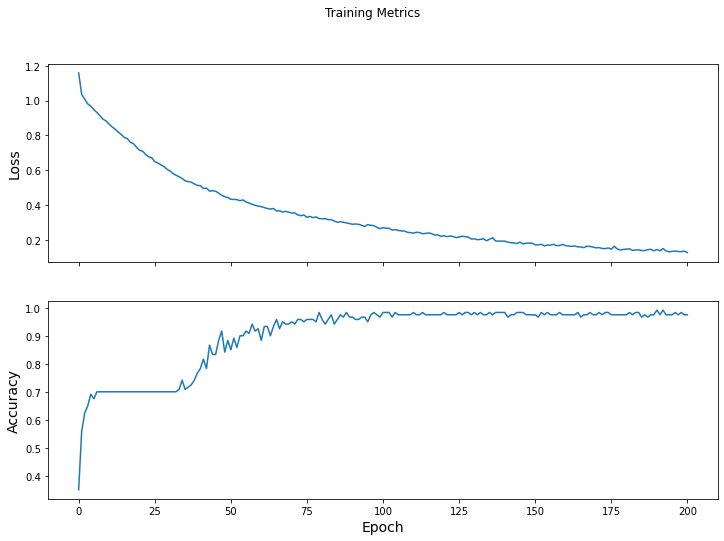

In [34]:
fig, axes = plt.subplots(2, sharex = True, figsize=(12, 8))
fig.suptitle('Training Metrics')
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [36]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [40]:
test_dataset = tf.data.experimental.make_csv_dataset(test_fp, batch_size, column_names=column_names, label_name="species"
                                                      , num_epochs=1, shuffle=False)
test_dataset = test_dataset.map(pack_features_vector)

In [41]:
test_accuracy = tf.keras.metrics.Accuracy()
for (x, y) in test_dataset:
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [42]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [43]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5],
    [5.9, 3.0, 4.2, 1.5],
    [6.9, 3.1, 5.4, 2.1]
])
predictions = model(predict_dataset, training=False)
for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

example 0 prediction: Iris setosa (97.6%)
example 1 prediction: Iris versicolor (88.1%)
example 2 prediction: Iris virginica (80.6%)


# Distributed training with keras

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import os
%load_ext tensorboard

In [3]:
print(tf.__version__)

2.7.0


In [4]:
datasets, info = tfds.load(name="mnist", with_info=True, as_supervised=True)
mnist_train, mnist_test = datasets['train'], datasets["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist downloaded and prepared to C:\Users\jatin\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [6]:
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

Number of devices: 1


In [7]:
num_train_examples =info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples
BUFFER_SIZE = 10000
BATCH_SIZE_PER_REPLICA = 64
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [8]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

In [9]:
train_datatset = mnist_train.map(scale).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
eval_dataset = mnist_test.map(scale).batch(BATCH_SIZE)

In [11]:
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam()
                  ,metrics=["accuracy"])

In [13]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

In [14]:
def decay(epoch):
    if epoch < 3:
        return 1e-3
    elif epoch >=3 and epoch < 7:mirror
        return 1e-4
    else:
        return 1e-5

In [15]:
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nLearning rate for epoch {} is {}".format(epoch + 1, model.optimizer.lr.numpy()))

In [16]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True),
    tf.keras.callbacks.LearningRateScheduler(decay), 
    PrintLR()
]

In [18]:
EPOCHS = 12
model.fit(train_datatset, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/12
936/938 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9370
Learning rate for epoch 1 is 0.0010000000474974513
938/938 [==============================] - 20s 17ms/step - loss: 0.2160 - accuracy: 0.9371 - lr: 0.0010
Epoch 2/12
937/938 [============================>.] - ETA: 0s - loss: 0.0710 - accuracy: 0.9790
Learning rate for epoch 2 is 0.0010000000474974513
938/938 [==============================] - 16s 17ms/step - loss: 0.0709 - accuracy: 0.9790 - lr: 0.0010
Epoch 3/12
936/938 [============================>.] - ETA: 0s - loss: 0.0487 - accuracy: 0.9855
Learning rate for epoch 3 is 0.0010000000474974513
938/938 [==============================] - 17s 18ms/step - loss: 0.0486 - accuracy: 0.9855 - lr: 0.0010
Epoch 4/12
937/938 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9925
Learning rate for epoch 4 is 9.999999747378752e-05
938/938 [==============================] - 17s 18ms/step - loss: 0.0271 - accuracy: 0.9926 - lr: 1.0

In [19]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
eval_loss, eval_acc = model.evaluate(eval_dataset)
print('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))

157/157 [==============================] - 2s 7ms/step - loss: 0.0387 - accuracy: 0.9866
Eval loss: 0.03865611180663109, Eval accuracy: 0.9865999817848206


In [22]:
path = 'saved_model/'
model.save(path, save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [23]:
unreplicated_model = tf.keras.models.load_model(path)
unreplicated_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                          optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
eval_loss, eval_acc = unreplicated_model.evaluate(eval_dataset)
print("Eval loss: {}, Eval Accuracy: {}".format(eval_loss, eval_acc))

157/157 [==============================] - 1s 6ms/step - loss: 0.0387 - accuracy: 0.9866
Eval loss: 0.03865611180663109, Eval Accuracy: 0.9865999817848206


In [24]:
with strategy.scope():
    replicated_model = tf.keras.models.load_model(path)
    replicated_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    eval_loss, eval_acc = replicated_model.evaluate(eval_dataset)
    print('Eval loss: {}, Eval Accuracy: {}'.format(eval_loss, eval_acc))

157/157 [==============================] - 1s 6ms/step - loss: 0.0387 - accuracy: 0.9866
Eval loss: 0.03865611180663109, Eval Accuracy: 0.9865999817848206


# Custom training with tf.distribute.Strategy

In [2]:
import tensorflow as tf
import numpy as np
import os
print(tf.__version__)

2.7.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images[..., None]
test_images = test_images[..., None]
train_images = train_images/np.float32(255)
test_images = test_images/np.float32(255)

In [5]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [6]:
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

Number of devices: 1


In [8]:
BUFFER_SIZE = len(train_images)
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
EPOCHS = 10

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(GLOBAL_BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(GLOBAL_BATCH_SIZE)
train_dist_dataset = strategy.experimental_distribute_dataset(train_dataset)
test_dist_dataset = strategy.experimental_distribute_dataset(test_dataset)

In [10]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10)
    ])
    return model

In [11]:
checkpoint_dir = './training_checkpoints'
checkpoint_perfix = os.path.join(checkpoint_dir, "ckpt")

In [12]:
with strategy.scope():
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
    def compute_loss(labels, predictions):
        per_example_loss = loss_object(labels, predictions)
        return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

In [14]:
with strategy.scope():
    test_loss = tf.keras.metrics.Mean(name="text_loss")
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="test_accuracy")

In [15]:
with strategy.scope():
    model = create_model()
    optimizer = tf.keras.optimizers.Adam()
    checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

In [25]:
def train_step(inputs):
    images, labels = inputs
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = compute_loss(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_accuracy.update_state(labels, predictions)
    return loss
def test_step(inputs):
    images, labels = inputs
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    test_loss.update_state(t_loss)
    test_accuracy.update_state(labels, predictions)

In [28]:
@tf.function
def distributed_train_step(dataset_inputs):
    per_replica_losses = strategy.run(train_step, args=(dataset_inputs,))
    return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis=None)
@tf.function
def distributed_test_step(dataset_inputs):
    return strategy.run(test_step, args=(dataset_inputs,))

In [31]:
for epoch in range(EPOCHS):
    total_loss = 0.0
    num_batches = 0
    for x in train_dist_dataset:
        total_loss += distributed_train_step(x)
        num_batches += 1
    train_loss = total_loss / num_batches
    for x in test_dist_dataset:
        distributed_test_step(x)
    if epoch % 2 == 0:
        checkpoint.save(checkpoint_perfix)
    template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accurcy: {}")
    print(template.format(epoch + 1, train_loss, train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() 
                          * 100))
    test_loss.reset_states()
    train_accuracy.reset_states()
    test_accuracy.reset_states()

Epoch 1, Loss: 0.26391667127609253, Accuracy: 87.33708190917969, Test Loss: 0.2961277961730957, Test Accurcy: 88.20999908447266
Epoch 2, Loss: 0.2398393601179123, Accuracy: 91.3316650390625, Test Loss: 0.28064945340156555, Test Accurcy: 89.55000305175781
Epoch 3, Loss: 0.22105537354946136, Accuracy: 91.88833618164062, Test Loss: 0.2689543068408966, Test Accurcy: 90.24000549316406
Epoch 4, Loss: 0.20419786870479584, Accuracy: 92.50833129882812, Test Loss: 0.2813921868801117, Test Accurcy: 89.61000061035156
Epoch 5, Loss: 0.18675732612609863, Accuracy: 93.16166687011719, Test Loss: 0.2603326439857483, Test Accurcy: 90.41000366210938
Epoch 6, Loss: 0.1730104237794876, Accuracy: 93.52833557128906, Test Loss: 0.2819155156612396, Test Accurcy: 90.43000030517578
Epoch 7, Loss: 0.1591654270887375, Accuracy: 94.05333709716797, Test Loss: 0.2682403326034546, Test Accurcy: 90.8699951171875
Epoch 8, Loss: 0.14525306224822998, Accuracy: 94.62333679199219, Test Loss: 0.2583645284175873, Test Accurcy

In [33]:
eval_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="eval_accuracy")
new_model = create_model()
new_optimizer = tf.keras.optimizers.Adam()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(GLOBAL_BATCH_SIZE)

In [34]:
@tf.function
def eval_step(images, labels):
    predictions = new_model(images, training=False)
    eval_accuracy(labels, predictions)

In [36]:
checkpoint = tf.train.Checkpoint(optimizer=new_optimizer, model=new_model)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
for images, labels in test_dataset:
    eval_step(images, labels)
print("Accuracy after restoring the saved model without strategy: {}".format(eval_accuracy.result() * 100))

Accuracy after restoring the saved model without strategy: 90.72999572753906


In [37]:
for _ in range(EPOCHS):
    total_loss = 0.0
    num_batches = 0
    train_iter = iter(train_dist_dataset)
    for _ in range(10):
        total_loss += distributed_train_step(next(train_iter))
        num_batches += 1
    average_train_loss = total_loss / num_batches
    template = ("Epoch {}, Loss: {}, Accuracy: {}")
    print(template.format(epoch + 1, average_train_loss, train_accuracy.result() * 100))
    train_accuracy.reset_states()

Epoch 10, Loss: 0.10664889961481094, Accuracy: 95.46875
Epoch 10, Loss: 0.10438810288906097, Accuracy: 97.1875
Epoch 10, Loss: 0.10810629278421402, Accuracy: 96.5625
Epoch 10, Loss: 0.09118185937404633, Accuracy: 96.71875
Epoch 10, Loss: 0.10947978496551514, Accuracy: 95.3125
Epoch 10, Loss: 0.07437606900930405, Accuracy: 96.875
Epoch 10, Loss: 0.09611891210079193, Accuracy: 97.03125
Epoch 10, Loss: 0.12086938321590424, Accuracy: 95.625
Epoch 10, Loss: 0.07670024037361145, Accuracy: 97.65625
Epoch 10, Loss: 0.09757016599178314, Accuracy: 96.25


In [39]:
@tf.function
def distributed_train_epoch(dataset):
    total_loss = 0.0
    num_batches = 0
    for x in dataset:
        per_replica_losses = strategy.run(train_step, args=(x,))
        total_loss += strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis=None)
        num_batches += 1
    return total_loss / tf.cast(num_batches, dtype=tf.float32)
for epoch in range(EPOCHS):
    train_loss = distributed_train_epoch(train_dist_dataset)
    template = ("Epoch {}, Loss: {}, Accuracy: {}")
    print(template.format(epoch + 1, train_loss, train_accuracy.result() * 100))
    train_accuracy.reset_states()

Epoch 1, Loss: 0.1116681769490242, Accuracy: 95.87166595458984
Epoch 2, Loss: 0.10413407534360886, Accuracy: 96.10333251953125
Epoch 3, Loss: 0.09299337863922119, Accuracy: 96.50166320800781
Epoch 4, Loss: 0.08608876913785934, Accuracy: 96.7933349609375
Epoch 5, Loss: 0.08118024468421936, Accuracy: 96.95333099365234
Epoch 6, Loss: 0.07375854253768921, Accuracy: 97.25
Epoch 7, Loss: 0.06840367615222931, Accuracy: 97.4749984741211
Epoch 8, Loss: 0.06574228405952454, Accuracy: 97.5250015258789
Epoch 9, Loss: 0.058284830302000046, Accuracy: 97.85833740234375
Epoch 10, Loss: 0.05368097126483917, Accuracy: 98.01333618164062


# Parameter server training with ParameterServerStrategy

In [1]:
import multiprocessing
import os
import random
import portpicker
import tensorflow as tf

In [2]:
def create_in_process_cluster(num_workers, num_ps):
    worker_ports = [portpicker.pick_unused_port() for _ in range(num_workers)]
    ps_ports = [portpicker.pick_unused_port() for _ in range(num_ps)]
    cluster_dict = {}
    cluster_dict["worker"] = ["localhost:%s"%port for port in worker_ports]
    if num_ps > 0:
        cluster_dict["ps"] = ["localhost:%s"%port for port in ps_ports]
    cluster_spec = tf.train.ClusterSpec(cluster_dict)
    worker_config = tf.compat.v1.ConfigProto()
    if multiprocessing.cpu_count() < num_workers + 1:
        worker_config.inter_op_parllelism_threads = num_workers + 1
    for i in range(num_workers):
        tf.distribute.Server(cluster_spec, job_name="worker", task_index=i, config=worker_config, protocol="grpc")
    for i in range(num_ps):
        tf.distribute.Server(cluster_spec, job_name="ps", task_index=i, protocol="grpc")
    cluster_resolver = tf.distribute.cluster_resolver.SimpleClusterResolver(cluster_spec, rpc_layer="grpc")
    return cluster_resolver
os.environ["GRPC_FAIL_FAST"] = "use_caller"
NUM_WORKERS = 3
NUM_PS = 2
cluster_resolver = create_in_process_cluster(NUM_WORKERS, NUM_PS)

In [3]:
variable_partitioner = tf.distribute.experimental.partitioners.MinSizePartitioner(min_shard_bytes=(256 << 10),
                                                                                  max_shards=NUM_PS)
strategy = tf.distribute.experimental.ParameterServerStrategy(cluster_resolver, variable_partitioner=variable_partitioner)

INFO:tensorflow:`tf.distribute.experimental.ParameterServerStrategy` is initialized with cluster_spec: ClusterSpec({'ps': ['localhost:21985', 'localhost:23016'], 'worker': ['localhost:15745', 'localhost:20940', 'localhost:18041']})
INFO:tensorflow:ParameterServerStrategyV2 is now connecting to cluster with cluster_spec: ClusterSpec({'ps': ['localhost:21985', 'localhost:23016'], 'worker': ['localhost:15745', 'localhost:20940', 'localhost:18041']})
INFO:tensorflow:ParameterServerStrategy (CentralStorageStrategy if you are using a single machine) with compute_devices = ['/job:chief/replica:0/task:0/device:CPU:0'], variable_device = '/job:chief/replica:0/task:0/device:CPU:0'
INFO:tensorflow:Number of GPUs on workers: 0


In [4]:
def dataset_fn(input_context):
    global_batch_size = 64
    batch_size = input_context.get_per_replica_batch_size(global_batch_size)
    x = tf.random.uniform((10, 10))
    y = tf.random.uniform((10,))
    dataset = tf.data.Dataset.from_tensor_slices((x, y)).shuffle(10).repeat()
    dataset = dataset.shard(input_context.num_input_pipelines, input_context.input_pipeline_id)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(2)
    return dataset
dc = tf.keras.utils.experimental.DatasetCreator(dataset_fn)

In [5]:
with strategy.scope():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss="mse", steps_per_execution=10)

In [6]:
working_dir = '/tmp/my_working_dir'
log_dir = os.path.join(working_dir, 'log')
ckpt_filepath = os.path.join(working_dir, "ckpt")
backup_dir = os.path.join(working_dir, 'backup')
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir),
    tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_filepath),
    tf.keras.callbacks.experimental.BackupAndRestore(backup_dir=backup_dir)
]
model.fit(dc, epochs=5, steps_per_epoch=20, callbacks=callbacks)

Epoch 1/5
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Assets written to: /tmp/my_working_dir\ckpt\assets
20/20 - 7s - loss: 0.3747 - 7s/epoch - 361ms/step
Epoch 2/5
INFO:tensorflow:Assets written to: /tmp/my_working_dir\ckpt\assets
20/20 - 2s - loss: 0.3299 - 2s/epoch - 82ms/step
Epoch 3/5
INFO:tensorflow:Assets written to

In [7]:
feature_vocab = [
    "avenger", "ironman", "batman", "hulk", "spiderman", "kingkong", "wonder_women"
]
label_vocab = ["yes", "no"]
with strategy.scope():
    feature_lookup_layer = tf.keras.layers.StringLookup(vocabulary=feature_vocab, mask_token=None)
    label_lookup_layer = tf.keras.layers.StringLookup(vocabulary=label_vocab, num_oov_indices=0, mask_token=None)
    
    raw_feature_input = tf.keras.layers.Input(shape=(3,), dtype=tf.string, name="feature")
    feature_id_input = feature_lookup_layer(raw_feature_input)
    feature_preprocess_stage = tf.keras.Model({"features":raw_feature_input}, feature_id_input)
    
    raw_label_input = tf.keras.layers.Input(shape=(1, ), dtype=tf.string, name="label")
    label_id_input = label_lookup_layer(raw_label_input)
    
    label_preprocess_stage = tf.keras.Model({"label":raw_label_input}, label_id_input)

In [8]:
def feature_and_label_gen(num_examples=200):
    examples = {"features": [], "label":[]}
    for _ in range(num_examples):
        features = random.sample(feature_vocab, 3)
        label = ["yes"] if "avenger" in features else ["no"]
        examples["features"].append(features)
        examples["label"].append(label)
    return examples

In [9]:
examples = feature_and_label_gen()

In [10]:
def dataset_fn(_):
    raw_dataset = tf.data.Dataset.from_tensor_slices(examples)
    train_dataset = raw_dataset.map(lambda x: ({"features": feature_preprocess_stage(x["features"])}, 
                                              label_preprocess_stage(x["label"]))).shuffle(200).batch(32).repeat()
    return train_dataset

In [11]:
with strategy.scope():
    model_input = tf.keras.layers.Input(shape=(3, ), dtype=tf.int64, name="model_input")
    emb_layer = tf.keras.layers.Embedding(input_dim=len(feature_lookup_layer.get_vocabulary()), output_dim=16384)
    emb_output = tf.reduce_mean(emb_layer(model_input), axis=1)
    dense_output = tf.keras.layers.Dense(units=1, activation="sigmoid")(emb_output)
    model = tf.keras.Model({"features":model_input}, dense_output)
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)
    accuracy = tf.keras.metrics.Accuracy()

In [12]:
assert len(emb_layer.weights) == 2
assert emb_layer.weights[0].shape == (4, 16384)
assert emb_layer.weights[1].shape == (4, 16384)
assert emb_layer.weights[0].device == "/job:ps/replica:0/task:0/device:CPU:0"
assert emb_layer.weights[1].device == "/job:ps/replica:0/task:1/device:CPU:0"

In [13]:
@tf.function
def step_fn(iterator):
    def replica_fn(batch_data, labels):
        with tf.GradientTape() as tape:
            pred = model(batch_data, training=True)
            per_example_loss = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)(labels, pred)
            loss = tf.nn.compute_average_loss(per_example_loss)
            gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        actual_pred = tf.cast(tf.greater(pred, 0.5), tf.int64)
        accuracy.update_state(labels, actual_pred)
        return loss
    batch_data, labels = next(iterator)
    losses = strategy.run(replica_fn, args=(batch_data, labels))
    return strategy.reduce(tf.distribute.ReduceOp.SUM, losses, axis=None)

In [14]:
coordinator = tf.distribute.experimental.coordinator.ClusterCoordinator(strategy)

In [15]:
@tf.function
def per_worker_dataset_fn():
    return strategy.distribute_datasets_from_function(dataset_fn)
per_worker_dataset = coordinator.create_per_worker_dataset(per_worker_dataset_fn)
per_worker_iterator = iter(per_worker_dataset)

In [16]:
num_epoches = 4
steps_per_epoch = 5
for i in range(num_epoches):
    accuracy.reset_states()
    for _ in range(steps_per_epoch):
        coordinator.schedule(step_fn, args=(per_worker_iterator, ))
    coordinator.join()
    print("Finished epoch %d, accuracy is %f."%(i, accuracy.result().numpy()))

INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
INFO:tensorflow:Reduce to /device:CPU:0 then broadcast to ('/replica:0/device:CPU:0',).
Finished epoch 0, accuracy is 0.650000.
Finished epoch 1, accuracy is 0.606250.
Finished epoch 2, accuracy is 1.000000.
Finished epoch 3, accuracy is 1.000000.


In [17]:
loss = coordinator.schedule(step_fn, args=(per_worker_iterator,))
print("Final loss is %f"%loss.fetch())

Final loss is 0.000000


In [18]:
total_steps = 20
import time
for _ in range(total_steps):
    coordinator.schedule(step_fn, args=(per_worker_iterator,))
while not coordinator.done():
    time.sleep(10)

In [19]:
eval_dataset = tf.data.Dataset.from_tensor_slices(feature_and_label_gen(num_examples=1)).map(lambda x: ({"features":feature_preprocess_stage(x["features"])}, label_preprocess_stage(x["label"]))).batch(8)

In [20]:
eval_accuracy = tf.keras.metrics.Accuracy()
for batch_data, labels in eval_dataset:
    pred = model(batch_data, training=False)
    actual_pred = tf.cast(tf.greater(pred, 0.5), tf.int64)
    eval_accuracy.update_state(labels, actual_pred)
print("Evalutation accuracy: %f"%eval_accuracy.result())

Evalutation accuracy: 1.000000


In [21]:
with strategy.scope():
    eval_accuracy = tf.keras.metrics.Accuracy()

@tf.function
def eval_step(iterator):
    def replica_fn(batch_data, labels):
        pred = model(batch_data, training=False)
        actual_pred = tf.cast(tf.greater(pred, 0.5), tf.int64)
        eval_accuracy.update_state(labels, actual_pred)
    batch_data, label = next(iterator)
    strategy.run(replica_fn, args=(batch_data, labels))

In [22]:
def eval_dataset_fn():
    return tf.data.Dataset.from_tensor_slices(feature_and_label_gen(num_examples=16)).map(lambda x: ({"features":feature_preprocess_stage(x["features"])}, label_preprocess_stage(x["label"]))).shuffle(16).repeat().batch(8)
per_worker_eval_dataset = coordinator.create_per_worker_dataset(eval_dataset_fn)
per_worker_eval_iterator = iter(per_worker_eval_dataset)
eval_steps_per_epoch = 2
for _ in range(eval_steps_per_epoch):
    coordinator.schedule(eval_step, args=(per_worker_eval_iterator,))
coordinator.join()
print("Evaluation accuracy: %f"%eval_accuracy.result())

Evaluation accuracy: 0.875000


In [23]:
checkpoint_dir = ...
eval_model = ...
eval_data = ...
checkpoint = tf.train.Checkpoint(model=eval_model)
for latest_checkpoint in train.checkpoints_iterator(checkpoint_dir):
    try: 
        checkpoint.restore(latest_checkpoint).expect_partial()
    except (tf.errors.OpError) as e:
        continue
    eval_model.evaluate(eval_data)
    if latest_checkpoint.endswith('-{}'.fromat(train_epoches)):
        break

ValueError: `Checkpoint` was expecting a trackable object (an object derived from `TrackableBase`), got Ellipsis. If you believe this object should be trackable (i.e. it is part of the TensorFlow Python API and manages state), please open an issue.

In [24]:
import json
os.environ["TF_CONFIG"] = json.dumps({
    "cluster":{
        "worker":["host1:port", "host2:port", "host3:port"],
        "ps":["host4:port", "host5:port"],
        "chief":["host6:port"]
    },
    "task":{"type":"worker", "index":1}
})

In [25]:
os.environ["TF_CONFIG"] = json.dumps({
    "cluster":{
        "evaluator":["host7:port"]
    },
    "task":{"type":"evaluator", "index":0}
})

In [ ]:
cluster_resolver = tf.distribute.cluster_resolver.TFConfigClusterResolver()
if cluster_resolver.task_type in ("worker", "ps"):
    #start tensorfow and wait
elif cluster_resolver.task_type == "evaluator":
    #Run side-car evaluation
else:
    #Run the coordinator

In [26]:
os.environ["GRPC_FAIL_FAST"] = "use_caller"
server = tf.distribute.Server(cluster_resolver.cluster_spec(), job_name=cluster_resolver.task_type, 
                              task_index=cluster_resolver.task_id, protocol=cluster_resolver.rpc_layer or "grpc",
                             start=True)
server.join()

ValueError: Must specify an explicit `job_name`.

In [27]:
checkpoint_manager = tf.train.CheckpointManager(tf.train.Checkpoint(model=model, optimizer=optimizer), 
                                                checkpoint_dir, max_to_keep=3)
if checkpoint_manager.latest_checkpoint:
    checkpoint = checkpoint_manager.checkpoint
    checkpoint.restore(checkpoint_manager.latest_checkpoint).assert_existing_objects_matched()
global_steps = int(optimizer.iterations.numpy())
starting_epoch = global_steps // steps_per_epoch
for _ in range(starting_epoch, num_epoches):
    for _ in range(steps_per_epoch):
        coordinator.schedule(step_fn, args=(per_worker_iterator,))
    coordinator.join()
    checkpoint_manager.save()

TypeError: expected str, bytes or os.PathLike object, not ellipsis

In [28]:
steps_per_invocation = 10
@tf.function
def step_fn(iterator):
    for _ in range(steps_per_invocation):
        features, labels = next(iterator)
        def replica_fn(features, labels):
            ...
        strategy.run(replica_fn, args=(features, labels))

# Save and Load

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
mirrored_strategy = tf.distribute.MirroredStrategy()
def get_data():
    datasets, ds_info = tfds.load(name="mnist", with_info=True, as_supervised=True)
    mnist_train, mnist_test = datasets['train'], datasets["test"]
    BUFFER_SIZE = 10000
    BATCH_SIZE_PER_REPLICA = 64
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA * mirrored_strategy.num_replicas_in_sync
    def scale(image, label):
        image = tf.cast(image, tf.float32)
        image /= 255
        return image, label
    train_dataset = mnist_train.map(scale).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    eval_dataset = mnist_test.map(scale).batch(BATCH_SIZE)
    return train_dataset, eval_dataset
def get_model():
    with mirrored_strategy.scope():
        model = tf.keras.Sequential([
              tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(28, 28, 1)),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(64, activation="relu"),
              tf.keras.layers.Dense(10)
          ])
        model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                     optimizer=tf.keras.optimizers.Adam(), metrics=[tf.metrics.SparseCategoricalAccuracy()])
        return model

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [4]:
model = get_model()
train_dataset, eval_dataset = get_data()
model.fit(train_dataset, epochs=2)

Epoch 1/2
938/938 [==============================] - 33s 31ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9463
Epoch 2/2
938/938 [==============================] - 27s 29ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9805


In [5]:
keras_model_path = "/tmp/keras_save"
model.save(keras_model_path)

INFO:tensorflow:Assets written to: /tmp/keras_save\assets


INFO:tensorflow:Assets written to: /tmp/keras_save\assets


In [7]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)
restored_keras_model.fit(train_dataset, epochs=2)

Epoch 1/2
938/938 [==============================] - 27s 28ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9859
Epoch 2/2
938/938 [==============================] - 26s 28ms/step - loss: 0.0311 - sparse_categorical_accuracy: 0.9904


In [8]:
another_strategy = tf.distribute.OneDeviceStrategy("/cpu:0")
with another_strategy.scope():
    restored_keras_model_ds = tf.keras.models.load_model(keras_model_path)
    restored_keras_model_ds.fit(train_dataset, epochs=2)

Epoch 1/2
938/938 [==============================] - 27s 28ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0.9861
Epoch 2/2
938/938 [==============================] - 26s 28ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9906


In [9]:
model = get_model()
saved_model_path = "/tmp/tf_save"
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /tmp/tf_save\assets


INFO:tensorflow:Assets written to: /tmp/tf_save\assets


In [10]:
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [11]:
predict_dataset = eval_dataset.map(lambda image, label:image)
for batch in predict_dataset.take(1):
    print(inference_func(batch))

{'dense_5': <tf.Tensor: shape=(64, 10), dtype=float32, numpy=
array([[-1.37114853e-01, -1.49498768e-02, -1.10214971e-01,
         3.56348678e-02, -1.91785656e-02,  1.14078321e-01,
         5.55092767e-02,  4.81047742e-02,  1.43898338e-01,
        -1.12261765e-01],
       [ 2.17927974e-02,  1.23404332e-01,  7.85274357e-02,
         8.15704837e-02, -1.48487184e-03, -1.23901553e-01,
         5.10416329e-02,  2.48231724e-01,  5.10737449e-02,
         3.04849129e-02],
       [ 3.08824563e-03,  2.11496517e-01, -1.75343066e-01,
         8.42709616e-02,  1.31318018e-01, -4.89521250e-02,
         1.55687317e-01,  8.80998969e-02,  1.25711992e-01,
        -1.26631446e-02],
       [-4.08514589e-02,  1.71852801e-02, -3.98247652e-02,
         1.41770259e-01, -6.94159791e-02, -2.98298486e-02,
        -4.08822633e-02, -2.02808436e-02,  1.47782445e-01,
        -2.03867435e-01],
       [-7.64520168e-02, -2.80860793e-02, -1.37519548e-02,
        -6.95603192e-02, -7.91720748e-02,  1.44338787e-01,
        

In [13]:
another_strategy = tf.distribute.MirroredStrategy()
with another_strategy.scope():
    loaded = tf.saved_model.load(saved_model_path)
    inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]
    dist_predict_dataset = another_strategy.experimental_distribute_dataset(predict_dataset)
    for batch in dist_predict_dataset:
        another_strategy.run(inference_func, args=(batch,))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [15]:
import tensorflow_hub as hub

In [18]:
def build_model(loaded):
    x = tf.keras.layers.Input(shape=(28, 28, 1), name='input_x')
    keras_layer = hub.KerasLayer(loaded, trainable=True)(x)
    model = tf.keras.Model(x, keras_layer)
    return model
another_strategy = tf.distribute.MirroredStrategy()
with another_strategy.scope():
    loaded = tf.saved_model.load(saved_model_path)
    model = build_model(loaded)
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                 optimizer = tf.keras.optimizers.Adam(), metrics=[tf.metrics.SparseCategoricalAccuracy()])
    model.fit(train_dataset, epochs=2)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Epoch 1/2
938/938 [==============================] - 29s 29ms/step - loss: 0.2022 - sparse_categorical_accuracy: 0.9405
Epoch 2/2
938/938 [==============================] - 27s 29ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9808 0s - loss: 0.0652 - sparse_categorical_accuracy: 0.98


In [20]:
model = get_model()
model.save(keras_model_path)
another_strategy = tf.distribute.MirroredStrategy()
with another_strategy.scope():
    loaded = tf.saved_model.load(keras_model_path)

INFO:tensorflow:Assets written to: /tmp/keras_save\assets


INFO:tensorflow:Assets written to: /tmp/keras_save\assets


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [23]:
model = get_model()
saved_model_path = "/tmp/tf_save"
save_options = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
model.save(saved_model_path, options=save_options)
another_strategy = tf.distribute.MirroredStrategy()
with another_strategy.scope():
    load_options = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
    loaded = tf.keras.models.load_model(saved_model_path, options=load_options)

INFO:tensorflow:Assets written to: /tmp/tf_save\assets


INFO:tensorflow:Assets written to: /tmp/tf_save\assets


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [25]:
class SubclassedModel(tf.keras.Model):
    output_name = 'output_layer'
    def __init__(self):
        super(SubclassedModel, self).__init__()
        self._dense_layer = tf.keras.layers.Dense(5, dtype=tf.dtypes.float32, name=self.output_name)
    def call(self, inputs):
        return self._dense_layer(inputs)
my_model = SubclassedModel()
tf.saved_model.save(my_model, saved_model_path)

INFO:tensorflow:Assets written to: /tmp/tf_save\assets


INFO:tensorflow:Assets written to: /tmp/tf_save\assets


# Distributed Input

In [26]:
import tensorflow as tf
import numpy as np
import os
print(tf.__version__)

2.7.0


In [28]:
global_batch_size = 16
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(100).batch(global_batch_size)
@tf.function
def train_step(inputs):
    features, labels = inputs
    return labels - 0.3 * features
for inputs in dataset:
    print(train_step(inputs))

tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(4, 1), dtype=float32)


In [29]:
global_batch_size = 16
mirrored_strategy = tf.distribute.MirroredStrategy()
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(100).batch(global_batch_size)
dist_dataset = mirrored_strategy.experimental_distribute_dataset(dataset)
print(next(iter(dist_dataset)))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


(<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>, <tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>)


In [31]:
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(64).batch(16)
options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
dataset = dataset.with_options(options)

In [34]:
mirrored_strategy = tf.distribute.MirroredStrategy()
def dataset_fn(input_context):
    bach_size = input_context.get_per_replica_batch_size(global_batch_size)
    dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(64).batch(16)
    dataset = dataset.shard(input_context.num_input_pipelines, input_context.input_pipeline_id)
    dataset = dataset.batch(global_batch_size)
    dataset = dataset.prefetch(2)
    return dataset
dist_dataset = mirrored_strategy.distribute_datasets_from_function(dataset_fn)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [35]:
global_batch_sie = 16
mirrored_strategy = tf.distribute.MirroredStrategy()
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(100).batch(global_batch_size)
dist_dataset = mirrored_strategy.experimental_distribute_dataset(dataset)
@tf.function
def train_step(inputs):
    features, labels = inputs
    return labels - 0.3 * features
for x in dist_dataset:
    loss = mirrored_strategy.run(train_step, args=(x,))
    print("Loss is ", loss)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tens

In [36]:
num_epochs = 10
steps_per_epoch = 5
for epoch in range(num_epochs):
    dist_iterator = iter(dist_dataset)
    for step in range(steps_per_epoch):
        loss = mirrored_strategy.run(train_step, args=(next(dist_iterator), ))
        print("Loss is ", loss)

Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(16, 1), dtype=float32)
Loss is  tf.Tens

In [37]:
@tf.function
def train_fn(iterator):
    for _ in tf.range(steps_per_loop):
        strategy.run(step_fn, args=(next(iterator), ))

In [38]:
global_batch_size = 4
steps_per_loop = 5
strategy = tf.distribute.MirroredStrategy(devices=["GPU:0", "CPU:0"])
dataset = tf.data.Dataset.range(9).batch(global_batch_size)
distributed_iterator = iter(strategy.experimental_distribute_dataset(dataset))
@tf.function
def train_fn(distributed_iterator):
    for _ in tf.range(steps_per_loop):
        optional_data = distributed_iterator.get_next_as_optional()
        if not optional_data.has_value():
            break
        per_replica_results = strategy.run(lambda x: x, args=(optional_data.get_value(), ))
        tf.print(strategy.experimental_local_results(per_replica_results))
train_fn(distributed_iterator)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:CPU:0')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:CPU:0')


([0 1], [2 3])
([4 5], [6 7])
([8], [])


In [41]:
global_batch_size = 16
epochs = 5
steps_per_epoch = 5
mirrored_strategy = tf.distribute.MirroredStrategy()
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(100).batch(global_batch_size)
dist_dataset = mirrored_strategy.experimental_distribute_dataset(dataset)
@tf.function(input_signature = [dist_dataset.element_spec])
def train_step(per_replica_inputs):
    def step_fn(inputs):
        return 2 * inputs
    return mirrored_strategy.run(step_fn, args=(per_replica_inputs,))
for _ in range(epochs):
    iterator = iter(dist_dataset)
    for _ in range(steps_per_epoch):
        output = train_step(next(iterator))
        tf.print(output)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]])
([[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]], [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 

In [42]:
d = tf.data.Dataset.list_files(pattern, shuffle=False)
d = d.shard(num_workers, worker_index)
d = d.repeat(num_epochs)
d = d.shuffle(shuffle_buffer_size)
d = d.interleave(tf.data.TFRecordDataset, cycle_length=num_readers, block_length=1)
d = d.map(parser_fn, num_parallel_calls=num_map_threads)

NameError: name 'pattern' is not defined

In [43]:
mirrored_strategy = tf.distribute.MirroredStrategy()
dataset_size = 24
batch_size = 6
dataset = tf.data.Dataset.range(dataset_size).enumerate().batch(batch_size)
dist_dataset = mirrored_strategy.experimental_distribute_dataset(dataset)

def predict(index, inputs):
    outputs = 2 * inputs
    return index, outputs
result = {}
for index, inputs in dist_dataset:
    output_index, outputs = mirrored_strategy.run(predict, args=(index, inputs))
    indices = list(mirrored_strategy.experimental_local_results(output_index))
    rindices = []
    for a in indices:
        rindices.extend(a.numpy())
    outputs = list(mirrored_strategy.experimental_local_results(outputs))
    routputs = []
    for a in outputs:
        routputs.extend(a.numpy())
    for i, value in zip(rindices, routputs):
        result[i] = value
print(result)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


{0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20, 11: 22, 12: 24, 13: 26, 14: 28, 15: 30, 16: 32, 17: 34, 18: 36, 19: 38, 20: 40, 21: 42, 22: 44, 23: 46}


In [45]:
mirrored_strategy = tf.distribute.MirroredStrategy()
worker_devices = mirrored_strategy.extended.worker_devices
def value_fn(ctx):
    return tf.constant(1.0)
distributed_values = mirrored_strategy.experimental_distribute_values_from_function(value_fn)
for _ in range(4):
    result = mirrored_strategy.run(lambda x: x, args=(distributed_values,))
    print(result)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [47]:
mirrored_strategy = tf.distribute.MirroredStrategy()
def input_gen():
    while True:
        yield np.random.rand(4)
dataset = tf.data.Dataset.from_generator(input_gen, output_types=(tf.float32), output_shapes=tf.TensorShape([4]))
dist_dataset = mirrored_strategy.experimental_distribute_dataset(dataset)
iterator = iter(dist_dataset)
for _ in range(4):
    mirrored_strategy.run(lambda x: x, args=(next(iterator),))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


# Convolution Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

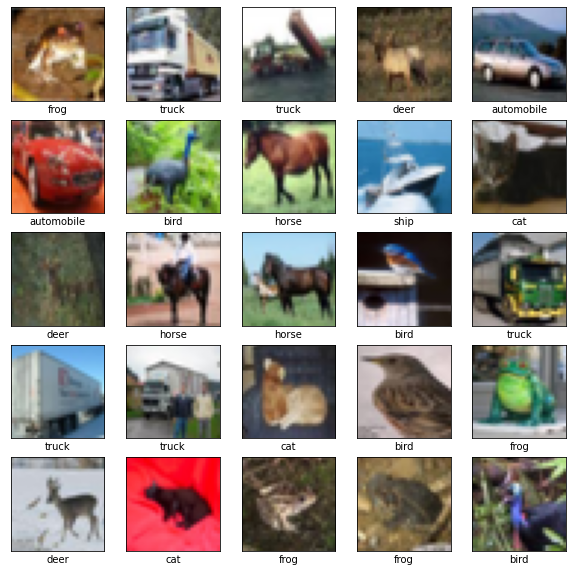

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [11]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5151 - accuracy: 0.4466 - val_loss: 1.2722 - val_accuracy: 0.5394
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1685 - accuracy: 0.5852 - val_loss: 1.0835 - val_accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0089 - accuracy: 0.6436 - val_loss: 0.9806 - val_accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9120 - accuracy: 0.6786 - val_loss: 0.9202 - val_accuracy: 0.6808
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8331 - accuracy: 0.7090 - val_loss: 0.8691 - val_accuracy: 0.6958
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7798 - accuracy: 0.7275 - val_loss: 0.9123 - val_accuracy: 0.6876
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7262 - accuracy: 0.7465 - val_loss: 0.8438 -

313/313 - 3s - loss: 0.8963 - accuracy: 0.7045 - 3s/epoch - 11ms/step


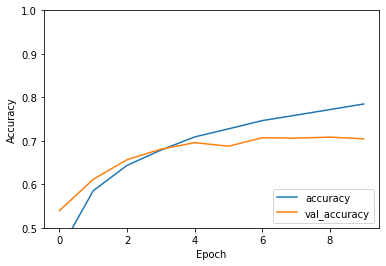

In [13]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc="lower right")
test_loss, test_Acc = model.evaluate(test_images, test_labels, verbose=2)

In [15]:
print(test_Acc)

0.7045000195503235


# Image Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


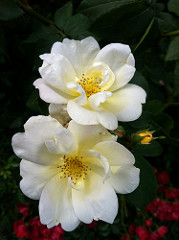

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

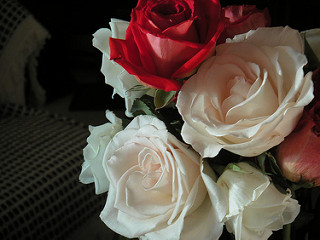

In [6]:
PIL.Image.open(str(roses[1]))

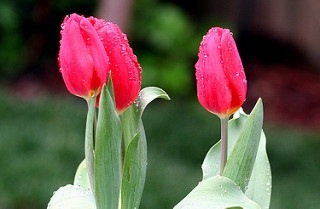

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

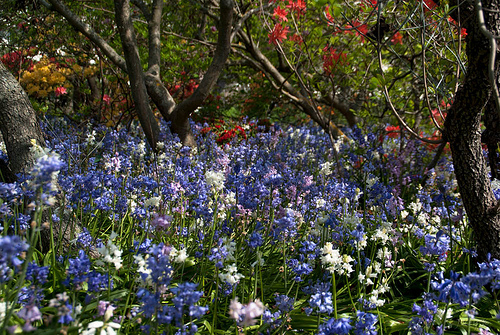

In [8]:
PIL.Image.open(str(tulips[1]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123,
                                                       image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123,
                                                    image_size=(img_height, img_width), batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


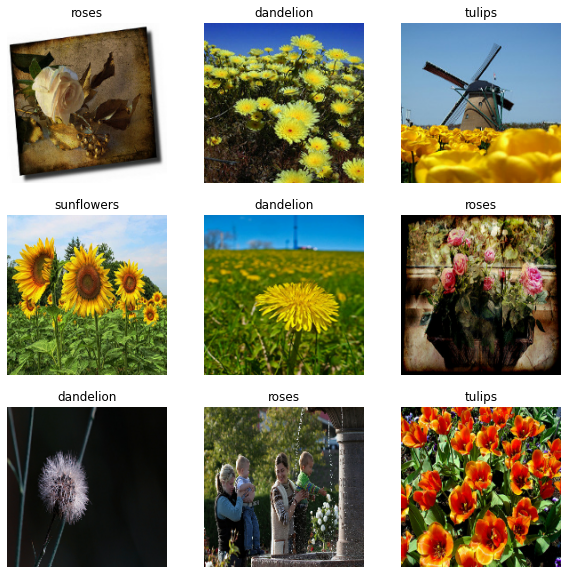

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
num_classes = 5
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [21]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
92/92 [==============================] - 73s 783ms/step - loss: 1.4331 - accuracy: 0.4166 - val_loss: 1.1091 - val_accuracy: 0.5381
Epoch 2/10
92/92 [==============================] - 71s 771ms/step - loss: 1.0538 - accuracy: 0.5668 - val_loss: 0.9629 - val_accuracy: 0.6322
Epoch 3/10
92/92 [==============================] - 71s 768ms/step - loss: 0.8660 - accuracy: 0.6580 - val_loss: 0.9498 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 70s 767ms/step - loss: 0.6734 - accuracy: 0.7524 - val_loss: 0.9345 - val_accuracy: 0.6471
Epoch 5/10
92/92 [==============================] - 71s 769ms/step - loss: 0.4883 - accuracy: 0.8266 - val_loss: 0.9824 - val_accuracy: 0.6349
Epoch 6/10
92/92 [==============================] - 71s 772ms/step - loss: 0.3152 - accuracy: 0.8951 - val_loss: 1.2696 - val_accuracy: 0.6417
Epoch 7/10
92/92 [==============================] - 71s 778ms/step - loss: 0.1763 - accuracy: 0.9397 - val_loss: 1.4000 - val_accuracy: 0.6308

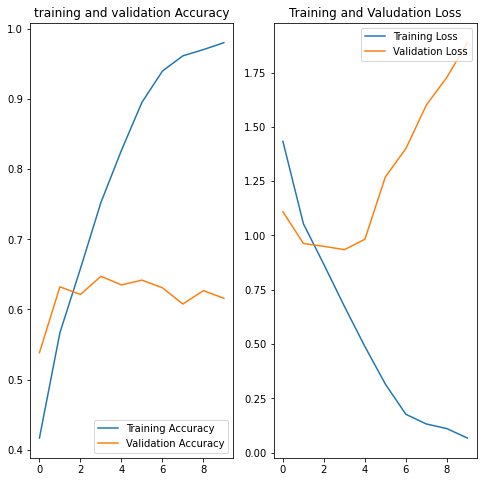

In [22]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('training and validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title('Training and Valudation Loss')
plt.show()

In [23]:
data_augmenation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

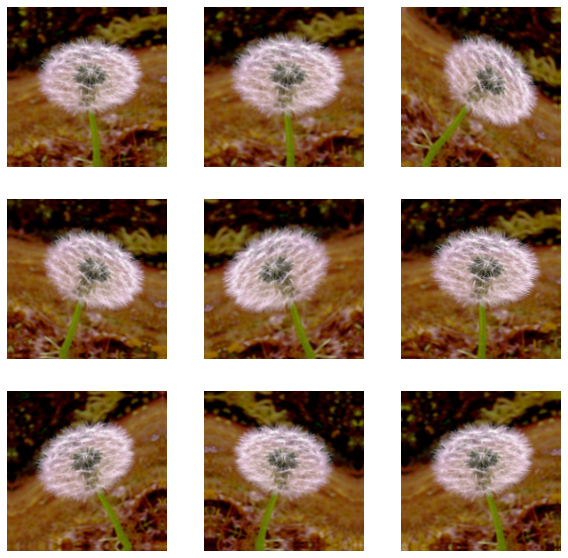

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmenation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
model = Sequential([
    data_augmenation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [30]:
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
92/92 [==============================] - 85s 904ms/step - loss: 1.4300 - accuracy: 0.3764 - val_loss: 1.1806 - val_accuracy: 0.4891
Epoch 2/15
92/92 [==============================] - 83s 905ms/step - loss: 1.1054 - accuracy: 0.5347 - val_loss: 1.0370 - val_accuracy: 0.5777
Epoch 3/15
92/92 [==============================] - 83s 908ms/step - loss: 1.0048 - accuracy: 0.5875 - val_loss: 0.9862 - val_accuracy: 0.6267
Epoch 4/15
92/92 [==============================] - 83s 905ms/step - loss: 0.9119 - accuracy: 0.6454 - val_loss: 0.9538 - val_accuracy: 0.6362
Epoch 5/15
92/92 [==============================] - 83s 901ms/step - loss: 0.8753 - accuracy: 0.6618 - val_loss: 0.8669 - val_accuracy: 0.6635
Epoch 6/15
92/92 [==============================] - 83s 903ms/step - loss: 0.8203 - accuracy: 0.6870 - val_loss: 0.8500 - val_accuracy: 0.6744
Epoch 7/15
92/92 [==============================] - 83s 900ms/step - loss: 0.7757 - accuracy: 0.6972 - val_loss: 0.8018 - val_accuracy: 0.6894

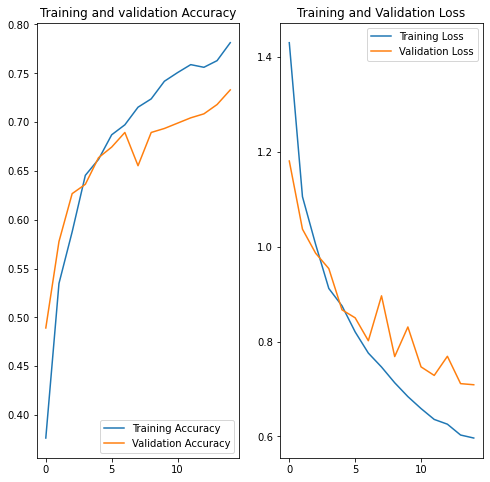

In [34]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')
plt.show()

In [35]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likey belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 
                                                                                     100 * np.max(score)))

131072/117948 [=================================] - 0s 3us/step
This image most likey belongs to sunflowers with a 99.77 percent confidence.


In [38]:
print(predictions)

[[-8.692049   -2.6325889  -0.83332694  7.8568907   1.6801159 ]]


In [39]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.4848678e-08, 2.7764574e-05, 1.6784182e-04, 9.9773192e-01,
       2.0724046e-03], dtype=float32)>

# Transfer learning and fine-tuning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

68616192/68606236 [==============================] - 1706s 25us/step
Found 2000 files belonging to 2 classes.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, 
                                                                image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


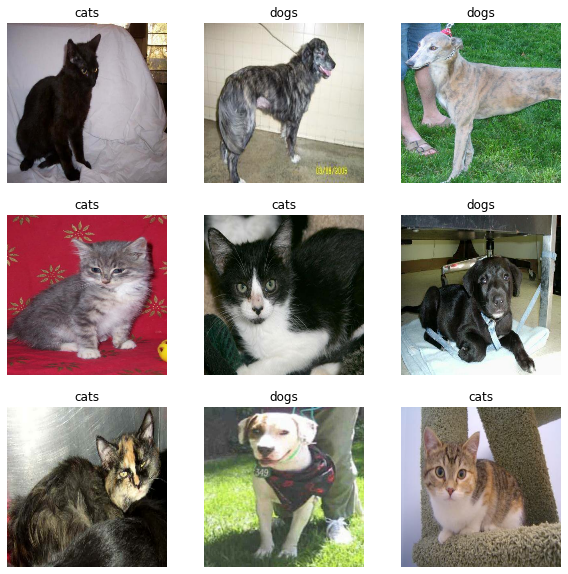

In [5]:
class_names = train_dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [8]:
print("Number of validation batches: %d"%tf.data.experimental.cardinality(validation_dataset))
print("Number of tes batches: %d"%tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of tes batches: 6


In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

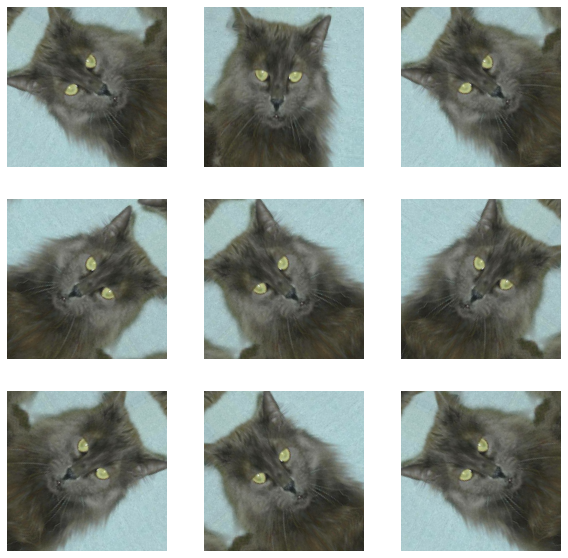

In [11]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0]/255)
        plt.axis("off")

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [15]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [16]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

9420800/9406464 [==============================] - 81s 9us/step


In [17]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [18]:
base_model.trainable = False

In [19]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [21]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [22]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [23]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [25]:
len(model.trainable_variables)

2

In [26]:
initial_epochs = 10
loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 20s 622ms/step - loss: 0.8713 - accuracy: 0.4666


In [27]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.87
initial accuracy: 0.47


In [28]:
history = model.fit(train_dataset, epochs=initial_epochs, validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 66s 968ms/step - loss: 0.7633 - accuracy: 0.5420 - val_loss: 0.5647 - val_accuracy: 0.6745
Epoch 2/10
63/63 [==============================] - 59s 938ms/step - loss: 0.5501 - accuracy: 0.6935 - val_loss: 0.4065 - val_accuracy: 0.8144
Epoch 3/10
63/63 [==============================] - 59s 942ms/step - loss: 0.4556 - accuracy: 0.7605 - val_loss: 0.3262 - val_accuracy: 0.8465
Epoch 4/10
63/63 [==============================] - 60s 944ms/step - loss: 0.3712 - accuracy: 0.8260 - val_loss: 0.2594 - val_accuracy: 0.8899
Epoch 5/10
63/63 [==============================] - 59s 942ms/step - loss: 0.3287 - accuracy: 0.8470 - val_loss: 0.2222 - val_accuracy: 0.9072
Epoch 6/10
63/63 [==============================] - 59s 942ms/step - loss: 0.2958 - accuracy: 0.8705 - val_loss: 0.1977 - val_accuracy: 0.9319
Epoch 7/10
63/63 [==============================] - 59s 940ms/step - loss: 0.2618 - accuracy: 0.8840 - val_loss: 0.1765 - val_accuracy: 0.9344

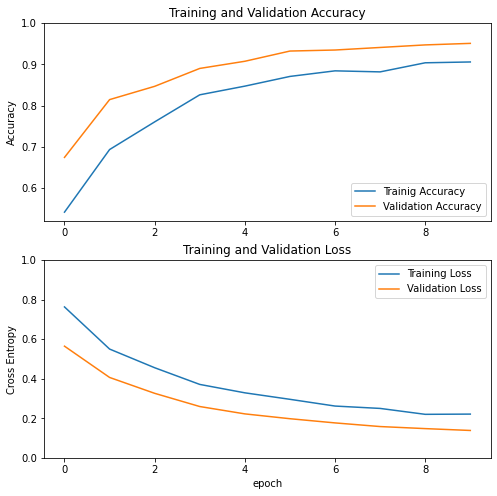

In [31]:
acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history["val_loss"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label="Trainig Accuracy")
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Validation Accuracy")

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title("Training and Validation Loss")
plt.xlabel('epoch')
plt.show()

In [32]:
base_model.trainable = True

In [33]:
print("Number of layers in the base model:", len(base_model.layers))
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model: 154


In [35]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
             optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10), metrics=["accuracy"])

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [37]:
len(model.trainable_variables)

56

In [38]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs
history_fine = model.fit(train_dataset, epochs=total_epochs, initial_epoch = history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 88s 1s/step - loss: 0.1542 - accuracy: 0.9350 - val_loss: 0.0691 - val_accuracy: 0.9715
Epoch 11/20
63/63 [==============================] - 77s 1s/step - loss: 0.1245 - accuracy: 0.9540 - val_loss: 0.0498 - val_accuracy: 0.9839
Epoch 12/20
63/63 [==============================] - 77s 1s/step - loss: 0.1207 - accuracy: 0.9475 - val_loss: 0.0483 - val_accuracy: 0.9814
Epoch 13/20
63/63 [==============================] - 77s 1s/step - loss: 0.0945 - accuracy: 0.9625 - val_loss: 0.0708 - val_accuracy: 0.9740
Epoch 14/20
63/63 [==============================] - 77s 1s/step - loss: 0.0982 - accuracy: 0.9650 - val_loss: 0.0475 - val_accuracy: 0.9790
Epoch 15/20
63/63 [==============================] - 77s 1s/step - loss: 0.0813 - accuracy: 0.9700 - val_loss: 0.0363 - val_accuracy: 0.9839
Epoch 16/20
63/63 [==============================] - 77s 1s/step - loss: 0.0738 - accuracy: 0.9710 - val_loss: 0.0378 - val_accuracy: 0.9864
Epoch 17/20
6

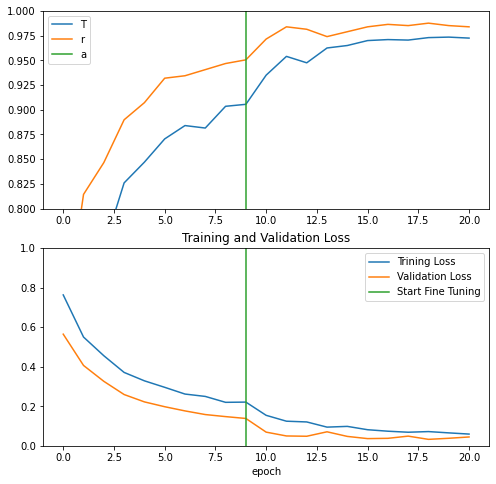

In [39]:
acc += history_fine.history["accuracy"]
val_acc += history_fine.history["val_accuracy"]
loss += history_fine.history["loss"]
val_loss += history_fine.history["val_loss"]

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.legend('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label="Trining Loss")
plt.plot(val_loss, label="Validation Loss")
plt.ylim([0, 1.0])
plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [40]:
loss, accuracy = model.evaluate(test_dataset)
print("Test accuracy: ", accuracy)

6/6 [==============================] - 4s 636ms/step - loss: 0.0473 - accuracy: 0.9740
Test accuracy:  0.9739583134651184


Predictions:
 [1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1]
Labels:
 [1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1]


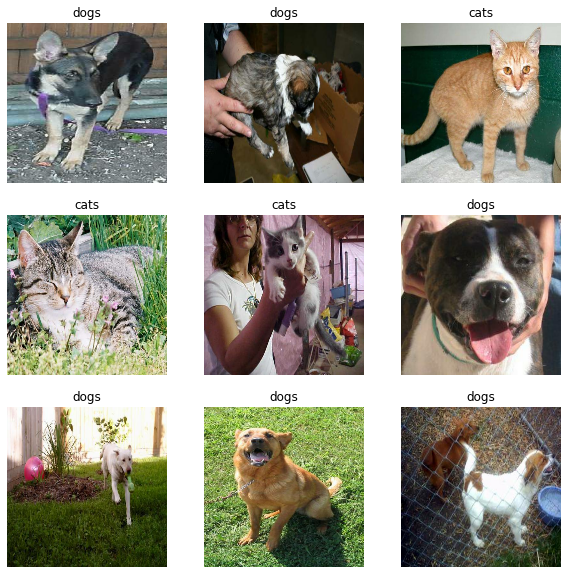

In [41]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
print("Predictions:\n", predictions.numpy())
print('Labels:\n', label_batch)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype('uint8'))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

# Transfer learning with Tensorflow Hub

In [42]:
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import datetime
%load_ext tensorboard

In [44]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"
classifier_model = mobilenet_v2

In [46]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

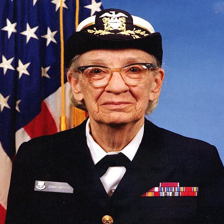

In [48]:
grace_hopper = tf.keras.utils.get_file("image.jpg", 
                                       "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [49]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [50]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [51]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=653>

In [53]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 1us/step


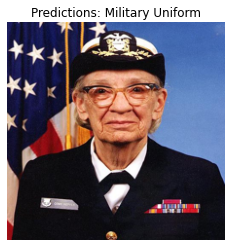

In [54]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Predictions: " + predicted_class_name.title())

In [55]:
data_root = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)

In [57]:
batch_size = 32
img_height = 224
img_width = 224
train_ds = tf.keras.utils.image_dataset_from_directory(str(data_root), validation_split=0.2, subset="training", seed=123,
                                                      image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(str(data_root), validation_split=0.2, subset="validation", 
                                                             seed=123, image_size=(img_height, img_width), 
                                                             batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [58]:
class_names = np.array(train_ds.class_names)
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [59]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [60]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [61]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [62]:
result_batch = classifier.predict(train_ds)

In [63]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'coral fungus', 'rapeseed', ..., 'daisy', 'daisy',
       'birdhouse'], dtype='<U30')

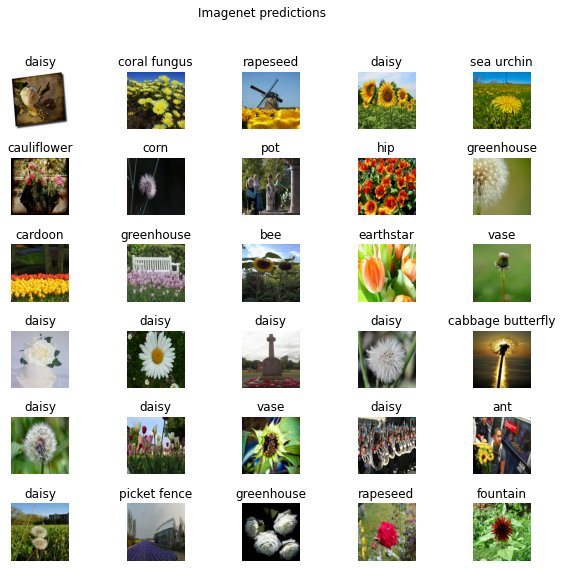

In [64]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
_ = plt.suptitle("Imagenet predictions")

In [65]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor_model = mobilenet_v2

In [66]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [68]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [70]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(num_classes)
])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [72]:
predictions = model(image_batch)

In [73]:
predictions.shape

TensorShape([32, 5])

In [75]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["acc"])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [77]:
NUM_EPOCHS = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=NUM_EPOCHS, callbacks=tensorflow_callback)

Epoch 1/10
92/92 [==============================] - 127s 1s/step - loss: 0.7637 - acc: 0.7210 - val_loss: 0.4359 - val_acc: 0.8556
Epoch 2/10
92/92 [==============================] - 119s 1s/step - loss: 0.3741 - acc: 0.8787 - val_loss: 0.3464 - val_acc: 0.8856
Epoch 3/10
92/92 [==============================] - 119s 1s/step - loss: 0.2932 - acc: 0.9104 - val_loss: 0.3135 - val_acc: 0.8937
Epoch 4/10
92/92 [==============================] - 118s 1s/step - loss: 0.2442 - acc: 0.9271 - val_loss: 0.2975 - val_acc: 0.8992
Epoch 5/10
92/92 [==============================] - 118s 1s/step - loss: 0.2093 - acc: 0.9428 - val_loss: 0.2887 - val_acc: 0.8978
Epoch 6/10
92/92 [==============================] - 118s 1s/step - loss: 0.1825 - acc: 0.9510 - val_loss: 0.2833 - val_acc: 0.8978
Epoch 7/10
92/92 [==============================] - 118s 1s/step - loss: 0.1611 - acc: 0.9595 - val_loss: 0.2799 - val_acc: 0.8978
Epoch 8/10
92/92 [==============================] - 118s 1s/step - loss: 0.1434 - a

In [78]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-11-30 00:35:47.493427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-30 00:35:47.497566: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-30 00:35:59.116928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-11-30 00:35:59.120434: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-30 00:35:59.133194: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-I5V5I39
2021-11-30 00:35:59.135242: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-I5V5I39
Traceback (most recent call last)

In [80]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

['roses' 'dandelion' 'tulips' 'sunflowers' 'dandelion' 'roses' 'dandelion'
 'roses' 'tulips' 'dandelion' 'tulips' 'tulips' 'sunflowers' 'tulips'
 'dandelion' 'roses' 'daisy' 'tulips' 'dandelion' 'dandelion' 'dandelion'
 'tulips' 'sunflowers' 'roses' 'sunflowers' 'dandelion' 'tulips' 'roses'
 'roses' 'sunflowers' 'tulips' 'sunflowers']


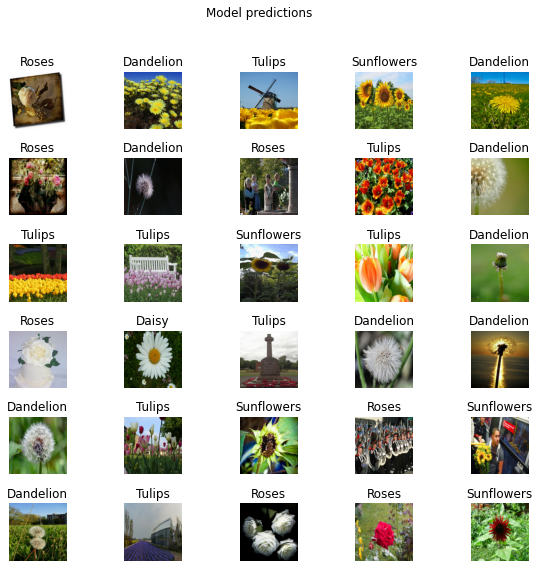

In [81]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.title(predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

In [82]:
t = time.time()
export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path)
export_path

INFO:tensorflow:Assets written to: /tmp/saved_models/1638193004\assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1638193004\assets


'/tmp/saved_models/1638193004'

In [83]:
reloaded = tf.keras.models.load_model(export_path)

In [84]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [85]:
abs(reloaded_result_batch - result_batch).max()

0.0

In [87]:
reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
reloaded_predicted_label_batch = class_names[reloaded_predicted_id]
print(reloaded_predicted_label_batch)

['roses' 'dandelion' 'tulips' 'sunflowers' 'dandelion' 'roses' 'dandelion'
 'roses' 'tulips' 'dandelion' 'tulips' 'tulips' 'sunflowers' 'tulips'
 'dandelion' 'roses' 'daisy' 'tulips' 'dandelion' 'dandelion' 'dandelion'
 'tulips' 'sunflowers' 'roses' 'sunflowers' 'dandelion' 'tulips' 'roses'
 'roses' 'sunflowers' 'tulips' 'sunflowers']


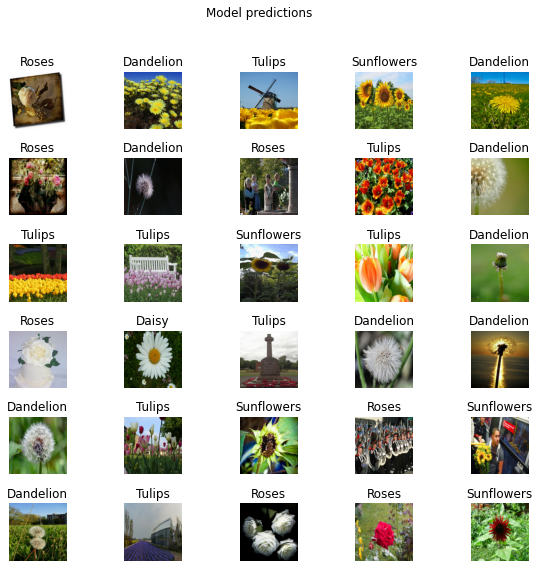

In [88]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.imshow(image_batch[n])
    plt.title(reloaded_predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

# Data Augmentation

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [56]:
(train_ds, val_ds, test_ds), metadata = tfds.load("tf_flowers", split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                 with_info=True, as_supervised=True)

In [57]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


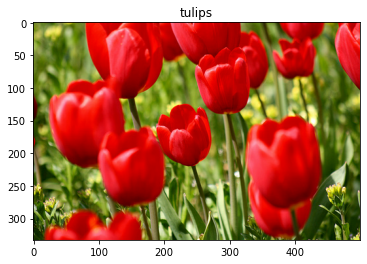

In [58]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [59]:
IMG_SIZE = 180
resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE), layers.Rescaling(1./255)])

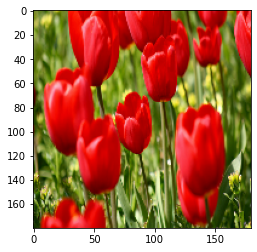

In [60]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [61]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


In [62]:
data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.2)])

In [63]:
image = tf.expand_dims(image, 0)

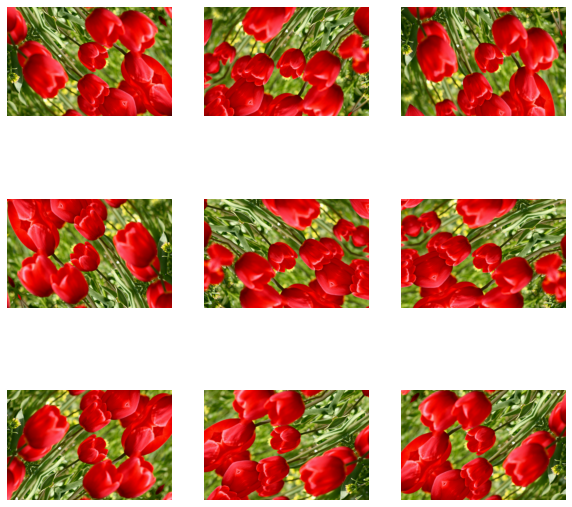

In [64]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [65]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    #Rest of your model
])

In [66]:
aug_ds = train_ds.map(lambda x, y: (resize_and_rescale(x, training=True), y))

In [67]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds, shuffle=False, augment=False):
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), num_parallel_calls=AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.batch(batch_size)
    if augment:
        ds = ds.map(lambda x, y:(data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    return ds.prefetch(buffer_size=AUTOTUNE)

In [68]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [69]:
model = tf.keras.Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [17]:
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
92/92 [==============================] - 80s 835ms/step - loss: 1.3684 - accuracy: 0.4114 - val_loss: 1.1776 - val_accuracy: 0.5095
Epoch 2/5
92/92 [==============================] - 77s 823ms/step - loss: 1.1030 - accuracy: 0.5392 - val_loss: 1.0232 - val_accuracy: 0.5722
Epoch 3/5
92/92 [==============================] - 75s 809ms/step - loss: 1.0168 - accuracy: 0.5882 - val_loss: 0.9774 - val_accuracy: 0.6322
Epoch 4/5
92/92 [==============================] - 76s 811ms/step - loss: 0.9357 - accuracy: 0.6315 - val_loss: 0.9565 - val_accuracy: 0.6431
Epoch 5/5
92/92 [==============================] - 77s 822ms/step - loss: 0.8919 - accuracy: 0.6471 - val_loss: 0.8564 - val_accuracy: 0.6676


In [18]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 3s 222ms/step - loss: 0.8205 - accuracy: 0.6649
Accuracy 0.664850115776062


In [71]:
def random_invert_img(x, p=0.5):
    if tf.random.uniform([]) < p:
        x = 255 - x
    else:
        x
    return x

In [72]:
def random_invert(factor=0.5):
    return layers.Lambda(lambda x: random_invert_img(x, factor))
random_invert = random_invert()

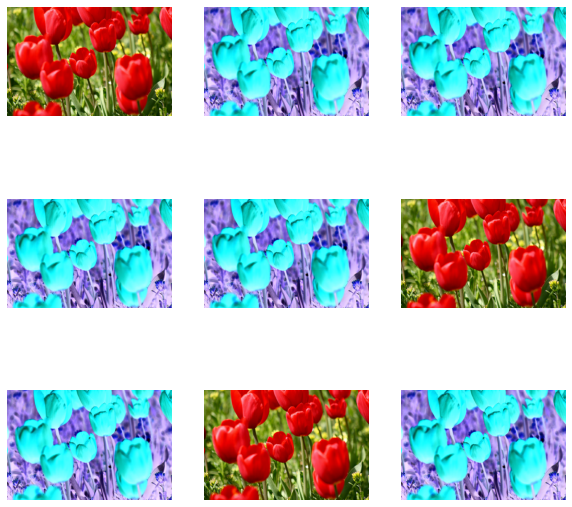

In [73]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = random_invert(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")

In [74]:
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor
    def call(self, x):
        return random_invert_img(x)

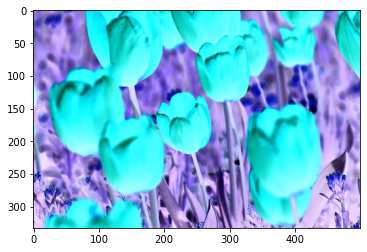

In [75]:
_ = plt.imshow(RandomInvert()(image)[0])

In [76]:
(train_ds, val_ds, test_ds), metadata = tfds.load('tf_flowers', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                 with_info=True, as_supervised=True)

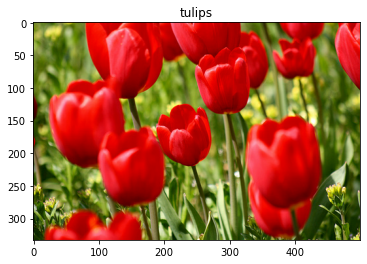

In [77]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [78]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('original image')
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title("Augmented image")
    plt.imshow(augmented)

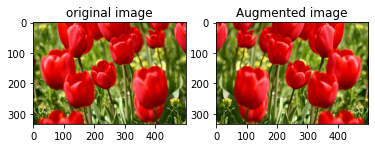

In [79]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

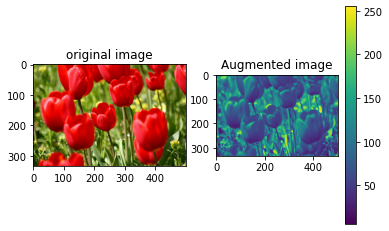

In [80]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

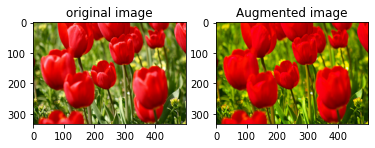

In [81]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

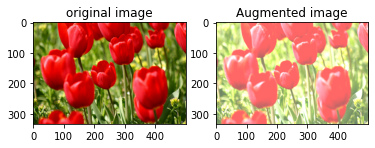

In [82]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

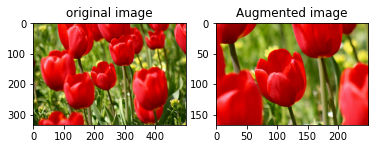

In [83]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

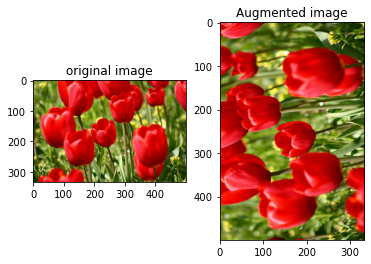

In [84]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

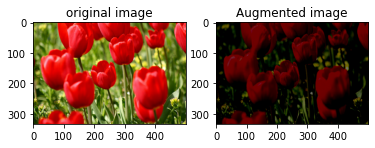

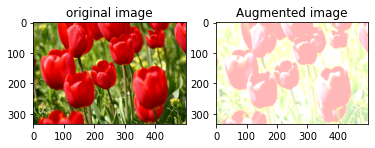

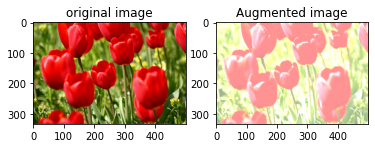

In [85]:
for i in range(3):
    seed = (i, 0)
    stateless_random_brightness = tf.image.stateless_random_brightness(image, max_delta=0.95, seed = seed)
    visualize(image, stateless_random_brightness)

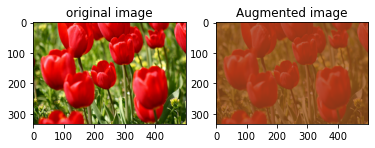

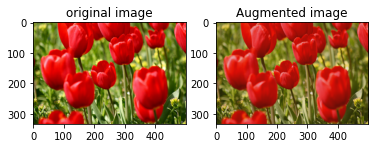

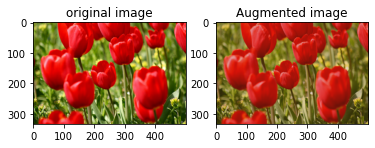

In [86]:
for i in range(3):
    seed = (i, 0)
    stateless_random_contrast = tf.image.stateless_random_contrast(image, lower=0.1, upper=0.9, seed=seed)
    visualize(image, stateless_random_contrast)

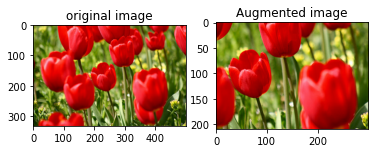

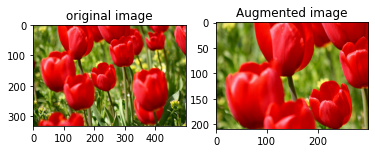

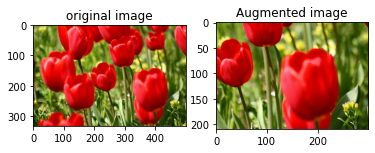

In [87]:
for i in range(3):
    seed = (i, 0)
    stateless_random_crop = tf.image.stateless_random_crop(image, size=[210, 300, 3], seed=seed)
    visualize(image, stateless_random_crop)

In [88]:
(train_dataset, val_ds, test_ds), metadata = tfds.load("tf_flowers", split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                 with_info=True, as_supervised=True)

In [89]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

In [90]:
def augment(image_label, seed):
    image, label = image_label
    image, label = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
    new_seed = tf.random.experiment.stateless_split(seed, num=1)[0, :]
    image = tf.image.stateless_random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
    image = tf.image.stateless_random_brightness(image, max_delta=0.5, seed=new_seed)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [91]:
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_dataset, (counter, counter)))

# Word Embedding

In [37]:
import io
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [38]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url, untar=True, cache_dir='.', cache_subdir='')
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [39]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [40]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [42]:
batch_size = 1024
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2, subset=
                                                     'training', seed=seed)
val_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2, 
                                                   subset="validation", seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [43]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])

0 b"Oh My God! Please, for the love of all that is holy, Do Not Watch This Movie! It it 82 minutes of my life I will never get back. Sure, I could have stopped watching half way through. But I thought it might get better. It Didn't. Anyone who actually enjoyed this movie is one seriously sick and twisted individual. No wonder us Australians/New Zealanders have a terrible reputation when it comes to making movies. Everything about this movie is horrible, from the acting to the editing. I don't even normally write reviews on here, but in this case I'll make an exception. I only wish someone had of warned me before I hired this catastrophe"
1 b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a tad bit "grease"esk (without

In [44]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
embedding_layer = tf.keras.layers.Embedding(1000, 5)

In [46]:
result = embedding_layer(tf.constant([1, 2, 3]))
result.numpy()

array([[-0.04738395,  0.04742132,  0.01742754, -0.03277115,  0.03560765],
       [ 0.02790703, -0.00951201, -0.02185699, -0.02908008, -0.03180227],
       [-0.00231736, -0.01208149,  0.03094286, -0.0089604 ,  0.03927764]],
      dtype=float32)

In [47]:
result = embedding_layer(tf.constant([[0, 1, 2], [3, 4, 5]]))
result.shape

TensorShape([2, 3, 5])

In [50]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]'%re.escape(string.punctuation), '')
vocab_size = 10000
sequence_length=100
vectorize_layer = TextVectorization(standardize = custom_standardization, max_tokens=vocab_size, output_mode='int',
                                   output_sequence_length=sequence_length)
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [51]:
embedding_dim = 16
model = Sequential([
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    GlobalAveragePooling1D(),
    Dense(16, activation="relu"),
    Dense(1)
])

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [54]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [55]:
model.fit(train_ds, validation_data = val_ds, epochs=15, callbacks=[tensorboard_callback])

Epoch 1/15
20/20 [==============================] - 17s 788ms/step - loss: 0.6919 - accuracy: 0.5028 - val_loss: 0.6896 - val_accuracy: 0.4886
Epoch 2/15
20/20 [==============================] - 6s 302ms/step - loss: 0.6856 - accuracy: 0.5028 - val_loss: 0.6813 - val_accuracy: 0.4886
Epoch 3/15
20/20 [==============================] - 6s 320ms/step - loss: 0.6750 - accuracy: 0.5028 - val_loss: 0.6689 - val_accuracy: 0.4886
Epoch 4/15
20/20 [==============================] - 7s 328ms/step - loss: 0.6592 - accuracy: 0.5028 - val_loss: 0.6514 - val_accuracy: 0.4886
Epoch 5/15
20/20 [==============================] - 6s 311ms/step - loss: 0.6375 - accuracy: 0.5029 - val_loss: 0.6286 - val_accuracy: 0.4900
Epoch 6/15
20/20 [==============================] - 6s 306ms/step - loss: 0.6101 - accuracy: 0.5306 - val_loss: 0.6015 - val_accuracy: 0.5576
Epoch 7/15
20/20 [==============================] - 6s 302ms/step - loss: 0.5783 - accuracy: 0.6124 - val_loss: 0.5719 - val_accuracy: 0.6290
Epoch

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 100)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trai

In [57]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [58]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
for index, word in enumerate(vocab):
    if index == 0:
        continue
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

# Word2Vec

In [1]:
import io
import re
import string
import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

In [3]:
sentence ="The wide road shimmered in the hot sun"
tokens = list(sentence.lower().split())
print(len(tokens))

8


In [4]:
vocab, index = {}, 1
vocab['<pad>'] = 0
for token in tokens:
    if token not in vocab:
        vocab[token] = index
        index += 1
vocab_size = len(vocab)
print(vocab)

{'<pad>': 0, 'the': 1, 'wide': 2, 'road': 3, 'shimmered': 4, 'in': 5, 'hot': 6, 'sun': 7}


In [5]:
inverse_vocab = {index: token for token, index in vocab.items()}
print(inverse_vocab)

{0: '<pad>', 1: 'the', 2: 'wide', 3: 'road', 4: 'shimmered', 5: 'in', 6: 'hot', 7: 'sun'}


In [6]:
example_sequence = [vocab[word] for word in tokens]
print(example_sequence)

[1, 2, 3, 4, 5, 1, 6, 7]


In [7]:
window_size = 2
positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(example_sequence, vocabulary_size=vocab_size, 
                                                                  window_size=window_size, negative_samples=0)
print(len(positive_skip_grams))

26


In [8]:
for target, context in positive_skip_grams[:5]:
    print(f"({target}, {context}): ({inverse_vocab[target]}, {inverse_vocab[context]})")

(4, 3): (shimmered, road)
(1, 3): (the, road)
(2, 1): (wide, the)
(2, 3): (wide, road)
(3, 4): (road, shimmered)


In [9]:
target_word, context_word = positive_skip_grams[0]
num_ns = 4
context_class = tf.reshape(tf.constant(context_word, dtype="int64"), (1, 1))
negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(true_classes=context_class, 
                                                                            num_true = 1, num_sampled=num_ns, 
                                                                            range_max = vocab_size, unique=True, 
                                                                            seed=SEED, name="negative_sampling")
print(negative_sampling_candidates)
print([inverse_vocab[index.numpy()] for index in negative_sampling_candidates])

tf.Tensor([2 1 4 3], shape=(4,), dtype=int64)
['wide', 'the', 'shimmered', 'road']


In [10]:
negative_sampling_candidates = tf.expand_dims(negative_sampling_candidates, 1)
context = tf.concat([context_class, negative_sampling_candidates], 0)
label = tf.constant([1] + [0] * num_ns, dtype="int64")
target = tf.squeeze(target_word)
context = tf.squeeze(context)
label = tf.squeeze(label)

In [11]:
print(f"target_index : {target}")
print(f"target_word : {inverse_vocab[target_word]}")
print(f"context_indices : {context}")
print(f"context_words : {[inverse_vocab[c.numpy()] for c in context]}")
print(f"label : {label}")

target_index : 4
target_word : shimmered
context_indices : [3 2 1 4 3]
context_words : ['road', 'wide', 'the', 'shimmered', 'road']
label : [1 0 0 0 0]


In [12]:
print("target : ", target)
print("context : ", context)
print("label : ", label)

target :  tf.Tensor(4, shape=(), dtype=int32)
context :  tf.Tensor([3 2 1 4 3], shape=(5,), dtype=int64)
label :  tf.Tensor([1 0 0 0 0], shape=(5,), dtype=int64)


In [13]:
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(size=10)
print(sampling_table)

[0.00315225 0.00315225 0.00547597 0.00741556 0.00912817 0.01068435
 0.01212381 0.01347162 0.01474487 0.0159558 ]


In [14]:
def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
    targets, contexts, labels = [], [], []
    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)
    for sequence in tqdm.tqdm(sequences):
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(sequence, vocabulary_size=vocab_size, 
                                                                          sampling_table=sampling_table, 
                                                                           window_size=window_size, negative_samples=0)
        for target_word, context_word in positive_skip_grams:
            context_class = tf.expand_dims(tf.constant([context_word], dtype="int64"), 1)
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(true_classes=context_class, 
                                                                                        num_true=1, num_sampled=num_ns,
                                                                                        unique=True, range_max=vocab_size,
                                                                                        seed=SEED, name="negative_sampling")
            negative_sampling_candidates = tf.expand_dims(negative_sampling_candidates, 1)
            context = tf.concat([context_class, negative_sampling_candidates], 0)
            label = tf.constant([1] + [0] * num_ns, dtype="int64")
            targets.append(target_word)
            contexts.append(context)
            labels.append(label)
    return targets, contexts, labels

In [15]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [16]:
with open(path_to_file) as f:
    lines = f.read().splitlines()
for line in lines[:20]:
    print(line)

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.


In [17]:
text_ds = tf.data.TextLineDataset(path_to_file).filter(lambda x: tf.cast(tf.strings.length(x), bool))

In [18]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    return tf.strings.regex_replace(lowercase, '[%s]'%re.escape(string.punctuation), '')
vocab_size = 4096
sequence_length = 10
vectorize_layer = layers.TextVectorization(standardize=custom_standardization, max_tokens=vocab_size, output_mode='int',
                                          output_sequence_length=sequence_length)

In [19]:
vectorize_layer.adapt(text_ds.batch(1024))

In [20]:
inverse_vocab = vectorize_layer.get_vocabulary()
print(inverse_vocab[:20])

['', '[UNK]', 'the', 'and', 'to', 'i', 'of', 'you', 'my', 'a', 'that', 'in', 'is', 'not', 'for', 'with', 'me', 'it', 'be', 'your']


In [21]:
text_vector_ds = text_ds.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()

In [22]:
sequences = list(text_vector_ds.as_numpy_iterator())
print(len(sequences))

32777


In [23]:
for seq in sequences[:5]:
    print(f"{seq} => {[inverse_vocab[i] for i in seq]}")

[ 89 270   0   0   0   0   0   0   0   0] => ['first', 'citizen', '', '', '', '', '', '', '', '']
[138  36 982 144 673 125  16 106   0   0] => ['before', 'we', 'proceed', 'any', 'further', 'hear', 'me', 'speak', '', '']
[34  0  0  0  0  0  0  0  0  0] => ['all', '', '', '', '', '', '', '', '', '']
[106 106   0   0   0   0   0   0   0   0] => ['speak', 'speak', '', '', '', '', '', '', '', '']
[ 89 270   0   0   0   0   0   0   0   0] => ['first', 'citizen', '', '', '', '', '', '', '', '']


In [24]:
targets, contexts, labels = generate_training_data(sequences=sequences, window_size=2, num_ns=4, vocab_size=vocab_size, 
                                                   seed=SEED)
targets = np.array(targets)
contexts = np.array(contexts)[:, :, 0]
labels = np.array(labels)
print('\n')
print(f"targets.shape: {targets.shape}")
print(f"contexts.shape: {contexts.shape}")
print(f"labels.shape: {labels.shape}")

100%|██████████| 32777/32777 [00:26<00:00, 1241.07it/s]




targets.shape: (65354,)
contexts.shape: (65354, 5)
labels.shape: (65354, 5)


In [25]:
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(dataset)

<BatchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [26]:
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(dataset)

<PrefetchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [27]:
class Word2Vec(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.target_embedding = layers.Embedding(vocab_size, embedding_dim, input_length=1, name="w2v_embedding")
        self.context_embedding = layers.Embedding(vocab_size, embedding_dim, input_length=num_ns + 1)
    def call(self, pair):
        target, context = pair
        if len(target.shape) == 2:
            target = tf.squeeze(target, axis=1)
        word_emb = self.target_embedding(target)
        context_emb = self.context_embedding(context)
        dots = tf.einsum('be,bce->bc', word_emb, context_emb)
        return dots

In [28]:
def custom_loss(x_logit, y_true):
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=y_true)

In [29]:
embedding_dim = 128
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [31]:
word2vec.fit(dataset, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
63/63 [==============================] - 3s 28ms/step - loss: 1.6082 - accuracy: 0.2324
Epoch 2/20
63/63 [==============================] - 2s 26ms/step - loss: 1.5889 - accuracy: 0.5539
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.5411 - accuracy: 0.6010
Epoch 4/20
63/63 [==============================] - 2s 27ms/step - loss: 1.4589 - accuracy: 0.5739
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3612 - accuracy: 0.5795
Epoch 6/20
63/63 [==============================] - 2s 27ms/step - loss: 1.2643 - accuracy: 0.6071
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 1.1737 - accuracy: 0.6409
Epoch 8/20
63/63 [==============================] - 2s 29ms/step - loss: 1.0895 - accuracy: 0.6758
Epoch 9/20
63/63 [==============================] - 2s 26ms/step - loss: 1.0112 - accuracy: 0.7093
Epoch 10/20
63/63 [==============================] - 2s 26ms/step - loss: 0.9383 - accuracy: 0.7396
Epoch 11/

In [32]:
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [37]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')
for index, word in enumerate(vocab):
    if index == 0:
        continue
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

# Text Classification with an RNN

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [2]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [4]:
for example, label in train_dataset.take(1):
    print('text:', example.numpy())
    print('label:', label.numpy())

text: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label: 0


In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
for example, label in train_dataset.take(1):
    print('texts:', example.numpy()[:3])
    print()
    print("labels:", label.numpy()[:3])

texts: [b'Its about time that Gunga Din is released on DVD. I cannot accurately say how many times I have watched this fine film but, I never tire of it. The lead actors worked so well together. Victor Mclaglen (Sgt McChesney), Cary Grant (Sgt Cutter) and Douglas Fairbanks Jr (Sgt Ballentine) are an unbeatable team.<br /><br />I just cannot get over their exploits in India. Your first glimpse at the Sergeants Three, is when you see them engaged in fighting with other soldiers over a so-called treasure Map. The three Sergeants are sent on an expedition to find out what happened to the communications line an they enter a mostly deserted town- or so they think.<br /><br />They engage in the necessary repairs and soon find a few "residents" in hiding. Soon after they get attacked by a group of madmen and barely make an escape back to base.<br /><br />Later they are sent on another mission which gives Sgt Cutter a chance to go hunting for the Gold with Din. They find the temple of gold and 

In [8]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [9]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [10]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 30,  43,  62, ...,   0,   0,   0],
       [ 29,   5, 144, ...,   0,   0,   0],
       [ 45,  23, 345, ...,   0,   0,   0]], dtype=int64)

In [11]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b'Its about time that Gunga Din is released on DVD. I cannot accurately say how many times I have watched this fine film but, I never tire of it. The lead actors worked so well together. Victor Mclaglen (Sgt McChesney), Cary Grant (Sgt Cutter) and Douglas Fairbanks Jr (Sgt Ballentine) are an unbeatable team.<br /><br />I just cannot get over their exploits in India. Your first glimpse at the Sergeants Three, is when you see them engaged in fighting with other soldiers over a so-called treasure Map. The three Sergeants are sent on an expedition to find out what happened to the communications line an they enter a mostly deserted town- or so they think.<br /><br />They engage in the necessary repairs and soon find a few "residents" in hiding. Soon after they get attacked by a group of madmen and barely make an escape back to base.<br /><br />Later they are sent on another mission which gives Sgt Cutter a chance to go hunting for the Gold with Din. They find the temple of gold a

In [12]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [14]:
sample_text = ('The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.00453289]


In [15]:
padding = "the" * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[-0.0045329]


In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4), 
             metrics=["accuracy"])

In [18]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 1187s 3s/step - loss: 0.6431 - accuracy: 0.5692 - val_loss: 0.5022 - val_accuracy: 0.7521
Epoch 2/10
391/391 [==============================] - 1824s 5s/step - loss: 0.4007 - accuracy: 0.8162 - val_loss: 0.3633 - val_accuracy: 0.8495
Epoch 3/10
391/391 [==============================] - 1761s 5s/step - loss: 0.3415 - accuracy: 0.8517 - val_loss: 0.3840 - val_accuracy: 0.8531
Epoch 4/10
391/391 [==============================] - 1987s 5s/step - loss: 0.3252 - accuracy: 0.8595 - val_loss: 0.3303 - val_accuracy: 0.8484
Epoch 5/10
391/391 [==============================] - 1810s 5s/step - loss: 0.3133 - accuracy: 0.8658 - val_loss: 0.3391 - val_accuracy: 0.8333
Epoch 6/10
391/391 [==============================] - 1762s 5s/step - loss: 0.3099 - accuracy: 0.8651 - val_loss: 0.3299 - val_accuracy: 0.8615
Epoch 7/10
391/391 [==============================] - 856s 2s/step - loss: 0.3068 - accuracy: 0.8672 - val_loss: 0.3219 - val_accuracy: 

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 128s 327ms/step - loss: 0.3243 - accuracy: 0.8634
Test Loss: 0.3243001699447632
Test Accuracy: 0.8634399771690369


(0.0, 0.6602042734622955)

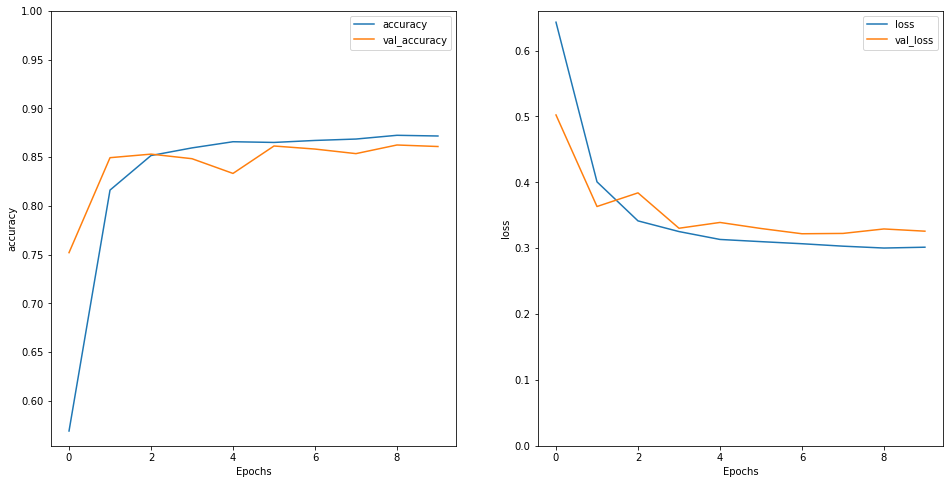

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [21]:
sample_text = ('The was cool. The animation and the graphics were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

In [23]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [24]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 1265s 3s/step - loss: 0.6308 - accuracy: 0.5834 - val_loss: 0.4482 - val_accuracy: 0.7880
Epoch 2/10
391/391 [==============================] - 2015s 5s/step - loss: 0.3855 - accuracy: 0.8297 - val_loss: 0.3527 - val_accuracy: 0.8391
Epoch 3/10
391/391 [==============================] - 2538s 6s/step - loss: 0.3359 - accuracy: 0.8552 - val_loss: 0.3407 - val_accuracy: 0.8474
Epoch 4/10
391/391 [==============================] - 2550s 7s/step - loss: 0.3196 - accuracy: 0.8618 - val_loss: 0.3306 - val_accuracy: 0.8594
Epoch 5/10
347/391 [=========================>....] - ETA: 4:46 - loss: 0.3120 - accuracy: 0.8645

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy", test_acc)

In [ ]:
sample_text = ('The movie was not good. The animation and the graphics were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

# Classify text with BERT

In [5]:
pip install -q tf-models-official

Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jatin\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jatin\\AppData\\Local\\Temp\\pip-install-rxqw64qv\\pycocotools_94c77b3f8d524a6786c0eb681ade03f5\\setup.py'"'"'; __file__='"'"'C:\\Users\\jatin\\AppData\\Local\\Temp\\pip-install-rxqw64qv\\pycocotools_94c77b3f8d524a6786c0eb681ade03f5\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jatin\AppData\Local\Temp\pip-wheel-09rlzv71'
       cwd: C:\Users\jatin\AppData\Local\Temp\pip-install-rxqw64qv\pycocotools_94c77b3f8d524a6786c0eb681ade03f5\
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64

In [1]:
import numpy as np
import typing
from typing import Any, Tuple
import tensorflow as tf
import tensorflow_text as tf_text
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
use_builtins = True

In [3]:
class ShapeChecker():
    def __init__(self):
        self.shapes = {}
    def __call__(self, tensor, names, broadcast=False):
        if not tf.executing_eagerly():
            return
        if isinstance(names, str):
            names=(names,)
        shape = tf.shape(tensor)
        rank = tf.rank(tensor)
        if rank != len(names):
            raise ValueError(f'Rank mismatch:\n found {rank}: {shape.numpy()}\n expected {len(names)}: {names}\n')
        for i, name in enumerate(names):
            if isinstance(name, int):
                old_dim = name
            else:
                old_dim = self.shapes.get(name, None)
            new_dim = shape[i]
            if broadcast and new_dim == 1:
                continue
            if old_dim is None:
                self.shapes[name] = new_dim
                continue
            if new_dim != old_dim:
                raise ValueError(f"shape mismatch for dimension: '{name}'\n found: {new_dim}\n expected: {old_dim}\n")

In [4]:
import pathlib
path_to_zip = tf.keras.utils.get_file('spa-eng.zip', 
                                      origin="http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip", 
                                      extract=True)
path_to_file = pathlib.Path(path_to_zip).parent/'spa-eng/spa.txt'

In [5]:
def load_data(path):
    text = path.read_text(encoding='utf-8')
    lines = text.splitlines()
    pairs = [line.split('\t') for line in lines]
    inp = [inp for targ, inp in pairs]
    targ = [targ for targ, inp in pairs]
    return targ, inp

In [6]:
targ, inp = load_data(path_to_file)
print(inp[-1])

Si quieres sonar como un hablante nativo, debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un músico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado.


In [7]:
print(targ[-1])

If you want to sound like a native speaker, you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo.


In [8]:
BUFFER_SIZE = len(inp)
BATCH_SIZE = 64
dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)

In [9]:
for example_input_batch, example_target_batch in dataset.take(1):
    print(example_input_batch[:5])
    print()
    print(example_target_batch[:5])
    break

tf.Tensor(
[b'El puente Golden Gate est\xc3\xa1 hecho de hierro.'
 b'No lo he visto en meses.' b'Repudiamos la violencia.' b'Avisale a Tom.'
 b'S\xc3\xa9 que Tom fue quien lo hizo, pero no podr\xc3\xa9 probarlo.'], shape=(5,), dtype=string)

tf.Tensor(
[b'The Golden Gate Bridge is made of iron.'
 b'I have not seen him in months.' b'We dislike violence.' b'Warn Tom.'
 b"I know Tom was the one who did it, but I won't ever be able to prove it."], shape=(5,), dtype=string)


In [10]:
example_text = tf.constant('\xc2\xbfTodavia\xc3\xada esta\xc3\xa1 en casa?')
print(example_text.numpy())
print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

b'\xc3\x82\xc2\xbfTodavia\xc3\x83\xc2\xada esta\xc3\x83\xc2\xa1 en casa?'
b'A\xcc\x82\xc2\xbfTodaviaA\xcc\x83\xc2\xada estaA\xcc\x83\xc2\xa1 en casa?'


In [11]:
def tf_lower_and_split_punct(text):
    text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, '[^ a-z.?!,]', '')
    text = tf.strings.regex_replace(text, '[.?!,]', r' \0 ')
    text = tf.strings.strip(text)
    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text

In [12]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

Â¿TodaviaÃ­a estaÃ¡ en casa?
[START] atodaviaaa estaa en casa ? [END]


In [13]:
max_vocab_size = 5000
input_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)

In [14]:
input_text_processor.adapt(inp)
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'que', 'de', 'el', 'a', 'no']

In [15]:
output_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)
output_text_processor.adapt(targ)
output_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'the', 'i', 'to', 'you', 'tom']

In [16]:
example_tokens = input_text_processor(example_input_batch)
example_tokens[:3, :10]

<tf.Tensor: shape=(3, 10), dtype=int64, numpy=
array([[   2,    7,  983,    1,    1,   19,  161,    6, 2477,    4],
       [   2,    9,   21,   73,  217,   13,  795,    4,    3,    0],
       [   2,    1,   11, 1887,    4,    3,    0,    0,    0,    0]],
      dtype=int64)>

In [17]:
input_vocab = np.array(input_text_processor.get_vocabulary())
tokens = input_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] el puente [UNK] [UNK] esta hecho de hierro . [END]    '

Text(0.5, 1.0, 'Mask')

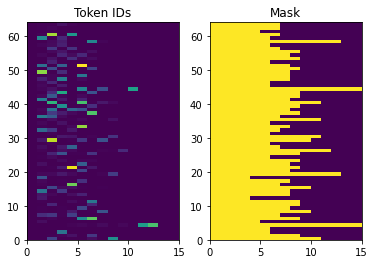

In [18]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')
plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens!=0)
plt.title('Mask')

In [19]:
embedding_dim = 256
units = 1024

In [20]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, input_vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.input_vocab_size = input_vocab_size
        self.embedding = tf.keras.layers.Embedding(self.input_vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units, return_sequences=True, return_state=True, 
                                       recurrent_initializer='glorot_uniform')
    def call(self, tokens, state=None):
        shape_checker = ShapeChecker()
        shape_checker(tokens, ('batch', 's'))
        vectors = self.embedding(tokens)
        shape_checker(vectors, ('batch', 's', 'embed_dim'))
        output, state = self.gru(vectors, initial_state=state)
        shape_checker(output, ('batch', 's', 'enc_units'))
        shape_checker(state, ('batch', 'enc_units'))
        return output, state

In [21]:
example_tokens = input_text_processor(example_input_batch)
encoder = Encoder(input_text_processor.vocabulary_size(), embedding_dim, units)
example_enc_output, example_enc_state = encoder(example_tokens)
print(f'Input batch, shape (batch): {example_input_batch.shape}')
print(f'Input batch tokens, shape (batch, s): {example_tokens.shape}')
print(f'Encoder output, shape (batch, s, units): {example_enc_output.shape}')
print(f'Encoder state, shape (batch, units): {example_enc_state.shape}')

Input batch, shape (batch): (64,)
Input batch tokens, shape (batch, s): (64, 15)
Encoder output, shape (batch, s, units): (64, 15, 1024)
Encoder state, shape (batch, units): (64, 1024)


In [22]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = tf.keras.layers.Dense(units, use_bias=False)
        self.W2 = tf.keras.layers.Dense(units, use_bias=False)
        self.attention = tf.keras.layers.AdditiveAttention()
    def call(self, query, value, mask):
        shape_checker = ShapeChecker()
        shape_checker(query, ('batch', 't', 'query_units'))
        shape_checker(value, ('batch', 's', 'value_units'))
        shape_checker(mask, ('batch', 's'))
        w1_query = self.W1(query)
        shape_checker(w1_query, ('batch', 't', 'attn_units'))
        w2_key = self.W2(value)
        shape_checker(w2_key, ('batch', 's', 'attn_units'))
        query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
        value_mask = mask
        context_vector, attention_weights = self.attention(inputs=[w1_query, value, w2_key], mask=[query_mask, value_mask],
                                                         return_attention_scores=True)
        shape_checker(context_vector, ('batch', 't', 'value_units'))
        shape_checker(attention_weights, ('batch', 't', 's'))
        return context_vector, attention_weights

In [23]:
attention_layer = BahdanauAttention(units)

In [24]:
(example_tokens != 0).shape

TensorShape([64, 15])

In [25]:
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])
context_vector, attention_weights = attention_layer(query=example_attention_query, value=example_enc_output, 
                                                    mask=(example_tokens != 0))
print(f'Attention result shape: (batch_size, query_seq_length, units): {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units): (64, 2, 1024)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (64, 2, 15)


Text(0.5, 1.0, 'mask')

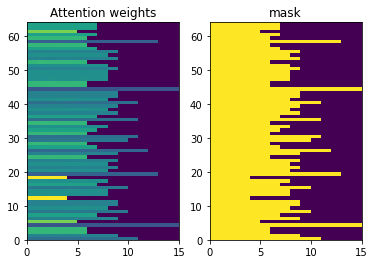

In [26]:
plt.subplot(1, 2, 1)
plt.pcolormesh(attention_weights[:, 0, :])
plt.title("Attention weights")
plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('mask')

In [27]:
attention_weights.shape

TensorShape([64, 2, 15])

In [28]:
attention_slice = attention_weights[0, 0].numpy()
attention_slice = attention_slice[attention_slice!=0]

<Figure size 432x288 with 0 Axes>

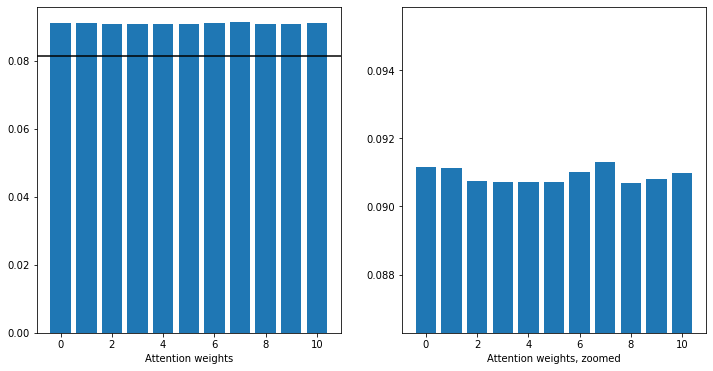

In [29]:
plt.suptitle('Attention weights for one sequence')
plt.figure(figsize=(12, 6))
a1 = plt.subplot(1, 2, 1)
plt.bar(range(len(attention_slice)), attention_slice)
plt.xlim(plt.xlim())
plt.xlabel('Attention weights')

a2 = plt.subplot(1, 2, 2)
plt.bar(range(len(attention_slice)), attention_slice)
plt.xlabel("Attention weights, zoomed")
top = max(a1.get_ylim())
zoom = .85*top
a2.set_ylim([0.90*top, top])
a1.plot(a1.get_xlim(), [zoom, zoom], color='k')

In [30]:
class DecoderInput(typing.NamedTuple):
    new_tokens: Any
    enc_output: Any
    mask: Any
class DecorderOutput(typing.NamedTuple):
    logits: Any
    attention_Weights: Any

In [31]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, output_vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.output_vocab_size = output_vocab_size
        self.embedding_dim = embedding_dim
        self.embedding = tf.keras.layers.Embedding(self.output_vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units, return_sequences=True, return_state=True, 
                                       recurrent_initializer="glorot_uniform")
        self.attention = BahdanauAttention(self.dec_units)
        self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh, use_bias=False)
        self.fc = tf.keras.layers.Dense(self.output_vocab_size)
    def call(self, inputs: DecoderInput, state=None)->Tuple[DecorderOutput, tf.Tensor]:
        shape_checker = ShapeChecker()
        shape_checker(inputs.new_tokens, ('batch', 't'))
        shape_checker(inputs.enc_output, ('batch', 's', 'enc_units'))
        shape_checker(inputs.mask, ('batch', 's'))
        if state is not None:
            shape_checker(state, ('batch', 'dec_units'))
        vectors = self.embedding(inputs.new_tokens)
        shape_checker(vectors, ('batch', 't', 'embedding_dim'))
        rnn_output, state = self.gru(vectors, initial_state=state)
        shape_checker(rnn_output, ('batch', 't', 'dec_units'))
        shape_checker(state, ('batch', 'dec_units'))
        context_vector, attention_weights = self.attention(query=rnn_output, value=inputs.enc_output, mask=inputs.mask)
        shape_checker(context_vector, ('batch', 't', 'dec_units'))
        shape_checker(attention_weights, ('batch', 't', 's'))
        context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)
        attention_vector = self.Wc(context_and_rnn_output)
        shape_checker(attention_vector, ('batch', 't', 'dec_units'))
        logits = self.fc(attention_vector)
        shape_checker(logits, ('batch', 't', 'output_vocab_size'))
        return DecorderOutput(logits, attention_weights), state

In [33]:
decoder = Decoder(output_text_processor.vocabulary_size(), embedding_dim, units)

In [34]:
example_output_tokens = output_text_processor(example_target_batch)
start_index = output_text_processor.get_vocabulary().index('[START]')
first_token = tf.constant([[start_index]] * example_output_tokens.shape[0])

In [35]:
dec_result, dec_state = decoder(inputs=DecoderInput(new_tokens=first_token, enc_output=example_enc_output, 
                                                    mask=(example_tokens != 0)), state=example_enc_state)
print(f"logits shape: (batch_size, t, output_vocab_size) {dec_result.logits.shape}")
print(f"state shape: (batch_size, dec_units) {dec_state.shape}")

logits shape: (batch_size, t, output_vocab_size) (64, 1, 5000)
state shape: (batch_size, dec_units) (64, 1024)


In [36]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)

In [37]:
vocab = np.array(output_text_processor.get_vocabulary())
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['sandwich'],
       ['antiques'],
       ['let'],
       ['clever'],
       ['extremely']], dtype='<U16')

In [39]:
dec_result, dec_state = decoder(DecoderInput(sampled_token, example_enc_output, mask=(example_tokens != 0)), 
                                state=dec_state)

In [40]:
sampled_token = tf.random.categorical(dec_result.logits[:, 0, :], num_samples=1)
first_word = vocab[sampled_token.numpy()]
first_word[:5]

array([['vain'],
       ['hit'],
       ['helpless'],
       ['shave'],
       ['license']], dtype='<U16')

In [131]:
class MaskedLoss(tf.keras.losses.Loss):
    def __init__(self):
        self.name = "masked_loss"
        self.loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction="none")
    def call(self, y_true, y_pred):
        shape_checker = ShapeChecker()
        shape_checker(y_true, ('batch', 't'))
        shape_checker(y_pred, ('batch', 't', 'logits'))
        loss = self.loss(y_true, y_pred)
        shape_checker(loss, ('batch', 't'))
        mask = tf.cast(y_true != 0, tf.float32)
        shape_checker(mask, ('batch', 't'))
        loss *= mask
        return tf.reduce_sum(loss)

In [132]:
class TrainTranslator(tf.keras.Model):
    def __init__(self, embedding_dim, units, input_text_processor, output_text_processor, use_tf_function=True):
        super().__init__()
        encoder = Encoder(input_text_processor.vocabulary_size(), embedding_dim, units)
        decoder = Decoder(output_text_processor.vocabulary_size(), embedding_dim, units)
        self.encoder = encoder
        self.decoder = decoder
        self.input_text_processor = input_text_processor
        self.output_text_processor = output_text_processor
        self.use_tf_function = use_tf_function
        self.shape_checker = ShapeChecker()
    def train_step(self, inputs):
        self.shape_checker = ShapeChecker()
        if self.use_tf_function:
            return self._tf_train_step(inputs)
        else:
            return self._train_step(inputs)

In [133]:
def _preprocess(self, input_text, target_text):
    self.shape_checker(input_text, ('batch',))
    self.shape_checker(target_text, ('batch',))
    input_tokens = self.input_text_processor(input_text)
    target_tokens = self.output_text_processor(target_text)
    self.shape_checker(input_tokens, ('batch', 's'))
    self.shape_checker(target_tokens, ('batch', 't'))
    input_mask = input_tokens != 0
    self.shape_checker(input_mask, ('batch', 's'))
    target_mask = target_tokens != 0
    self.shape_checker(target_mask, ('batch', 't'))
    return input_tokens, input_mask, target_tokens, target_mask

In [134]:
TrainTranslator._preprocess = _preprocess

In [135]:
def _train_step(self, inputs):
    input_text, target_text = inputs
    (input_tokens, input_mask, target_tokens, target_mask) = self._preprocess(input_text, target_text)
    max_target_length = tf.shape(target_tokens)[1]
    with tf.GradientTape() as tape:
        enc_output, enc_state = self.encoder(input_tokens)
        self.shape_checker(enc_output, ('batch', 's', 'enc_units'))
        self.shape_checker(enc_state, ('batch', 'enc_units'))
        dec_state = enc_state
        loss = tf.constant(0.0)
        for t in tf.range(max_target_length-1):
            new_tokens = target_tokens[:, t:t+2]
            step_loss, dec_state = self._loop_step(new_tokens, input_mask, enc_output, dec_state)
            loss = loss + step_loss
        average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))
    variables = self.trainable_variables
    gradients = tape.gradients(average_loss, variables)
    self.optimizer.apply_gradients(zip(gradients, variables))
    return {'batch_loss': average_loss}

In [136]:
TrainTranslator._train_step = _train_step

In [137]:
def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
    input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]
    decorder_input = DecoderInput(new_tokens=input_token, enc_output=enc_output, mask=input_mask)
    dec_result, dec_state = self.decoder(decorder_input, state=dec_state)
    self.shape_checker(dec_result.logits, ('batch', "t1", "logits"))
    self.shape_checker(dec_result.attention_Weights, ('batch', 't1', 's'))
    self.shape_checker(dec_state, ('batch', 'dec_units'))
    y = target_token
    y_pred = dec_result.logits
    step_loss = self.loss(y, y_pred)
    return step_loss, dec_state

In [138]:
TrainTranslator._loop_step = _loop_step

In [139]:
translator = TrainTranslator(embedding_dim, units, input_text_processor=input_text_processor, output_text_processor=
                            output_text_processor, use_tf_function=False)
translator.compile(optimizer=tf.optimizers.Adam(), loss=MaskedLoss)

In [140]:
np.log(output_text_processor.vocabulary_size())

8.517193191416238

In [141]:
%%time
for n in range(10):
    print(translator.train_step([example_input_batch, example_target_batch]))
print()

TypeError: __init__() takes 1 positional argument but 3 were given

# Image captioning with visual attention

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
annotation_folder = '/annotations/'

annotation_zip = tf.keras.utils.get_file('captions.zip', cache_subdir=os.path.abspath('.'), 
                                            origin='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                            extract=True)
annotation_file = os.path.dirname(annotation_zip) + '/annotations/captions_train2014.json'
os.remove(annotation_zip)


 25280512/252872794 [=>............................] - ETA: 7:57

In [4]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

NameError: name 'annotation_file' is not defined